In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation as R
import json
import matplotlib.patches as patches
from mpl_toolkits import mplot3d
from matplotlib import colors
import os

In [2]:
def plot(points_to_plot, x_lim, y_lim, z_lim, view=(0,180), point_size=0.2):
    # PLOT THE IMAGE
    dpi = 100       # Image resolution

    fig, ax1 = plt.subplots(figsize=(30,30), dpi=dpi)

    ax = plt.axes(projection ='3d')
    ax.scatter(points_to_plot[:, 0], points_to_plot[:, 1], points_to_plot[:, 2], s=point_size, c=points_to_plot[:, 3])

    ax.view_init(view[0], view[1]) # (0, 180)

    ax.set_xlabel('$X$', fontsize=20)
    ax.set_ylabel('$Y$', fontsize=20)
    ax.set_zlabel('$Z$', fontsize=20)

    ax.axis('scaled')

    plt.xlim(x_lim)  
    plt.ylim(y_lim)
    ax.set_zlim(z_lim)

    plt.show()

In [3]:
### Config ###
date = '2019_02_27'
seq = '0078'
frame_id = 0
DISTORTED = True


In [4]:
BASE = "C:/Users/meiqt/Repos/dataset/cadcd"
OUTPUT = 'output/'

if DISTORTED:
  path_type = 'raw'
else:
  path_type = 'labeled'

lidar_path = os.path.join(BASE, date + '/' + seq + "/" + path_type + "/lidar_points/data/" + format(frame_id, '010') + ".bin")

In [5]:
# Cropping
x_range = [-50, 50] 
y_range = [-50, 50]
z_range = [-4, 15]

if seq == '0009':
    if frame_id == 0:
        snow_cropping_x_range = x_range
        snow_cropping_y_range = [-21, 17] # [-10, 16]
    elif frame_id == 1:
        snow_cropping_x_range = x_range
        snow_cropping_y_range = [-21, 16]
    elif frame_id == 400:
        snow_cropping_x_range = x_range
        snow_cropping_y_range = [-17, 15]
elif seq == '0078':
    if frame_id == 325:
        snow_cropping_x_range = x_range
        snow_cropping_y_range = y_range
    elif frame_id == 0:
        snow_cropping_x_range = x_range
        snow_cropping_y_range = y_range
elif seq == '0016':
    if frame_id == 90:
        snow_cropping_x_range = [-20, 21]
        snow_cropping_y_range = [-5, 13]

In [6]:
lidar_data = np.fromfile(lidar_path, dtype= np.float32).reshape((-1, 4))

n_points = lidar_data.shape[0]

In [486]:
snow_points = []
removed_points = []
trimmed_lidar_data = []
snow_outliers = []
for i in range(n_points):
    lidar_x, lidar_y, lidar_z, lidar_intensity = lidar_data[i] 
    
    if seq == '0009':
        if frame_id == 0:
            snow_condition = lidar_z > -0.5 \
                        and snow_cropping_y_range[0] < lidar_y < snow_cropping_y_range[1] \
                        and not( lidar_z < 2 and lidar_y < -19) \
                        and not( lidar_z < 1.4 and lidar_y < -17) \
                        and not( lidar_z < 1.3 and lidar_y < -14) \
                        and not( lidar_z < 0 and lidar_y < -11) \
                        and not( lidar_x > 25 and lidar_y > 10) \
                        and not( 11 < lidar_x < 12.5 and -14 < lidar_y < -13) \
                        and not( 11 < lidar_x < 12 and 16 < lidar_y < 17) \
                        and not( 23 < lidar_x < 24 and 0 < lidar_y < 0.5) \
                        and not( 26 < lidar_x < 27 and -18 < lidar_y < -17) \
                        and not( 32 < lidar_x < 34 and -17 < lidar_y < -16) \
                        and not( -32 < lidar_x < -31 and 15 < lidar_y < 16) \
                        and (-32 < lidar_x < 42)
        elif frame_id == 1:
            snow_condition = lidar_z > -0.5 \
                        and snow_cropping_y_range[0] < lidar_y < snow_cropping_y_range[1]\
                        and not( lidar_z < 2.1 and lidar_y < -19) \
                        and not( lidar_z < 1.4 and lidar_y < -17) \
                        and not( lidar_z < 1.3 and lidar_y < -14) \
                        and not( lidar_z < 0.1 and lidar_y < -11) \
                        and (-30 < lidar_x < 40)
        elif frame_id == 400:
            snow_condition = lidar_z > -1 \
                        and snow_cropping_y_range[0] < lidar_y < snow_cropping_y_range[1] \
                        and not( lidar_z < -0.4 and lidar_y < -15) \
                        and not( -19 < lidar_x < -18 and -16 < lidar_y < -15) \
                        and not( 21 < lidar_x < 22 and -1.8 < lidar_y < -1.7) \
                        and not( 24 < lidar_x < 25 and -15 < lidar_y < -14) \
                        and not( 21 < lidar_x < 22 and -15 < lidar_y < -14) \
                        and (-25 < lidar_x < 25)
    elif seq == '0078':
        if frame_id == 325:
            snow_condition = lidar_z > -1.5 \
                        and snow_cropping_y_range[0] < lidar_y < snow_cropping_y_range[1] \
                        and not( lidar_z < 0 and lidar_y < -35) \
                        and not( lidar_z < -1 and lidar_y < 5) \
                        and not( lidar_x < -22 and lidar_y < -5) \
                        and not( -35 < lidar_y < -34.9 and -1.37 < lidar_x < -1.36) \
                        and not( 31 < lidar_x < 38 and -11 < lidar_y < -8) \
                        and not( 28 < lidar_x < 29 and -10 < lidar_y < -9) \
                        and not( lidar_x > 39.7 ) \
                        and not( lidar_y > 34 ) \
                        and not( -10.2 < lidar_y < -9.7)
        elif frame_id == 0:
            snow_condition = lidar_z > -1.5 \
                        and snow_cropping_y_range[0] < lidar_y < snow_cropping_y_range[1] \
                        and not( 18.9 < lidar_x < 19.1 and -5.5 < lidar_y < -5) \
                        and not( 14 < lidar_x < 14.5 and 9.5 < lidar_y < 10) \
                        and not( 44 < lidar_x and lidar_y < -43) \
                        and not( 35.5 < lidar_x < 36 and -1 < lidar_y < 1) \
                        and not( 0 < lidar_x < 1 and 8.4 < lidar_y < 8.5 and -2.4 < lidar_z < -2.3 ) \
                        and not( 42 < lidar_x and lidar_y > 40) \
                        and not( -50 < lidar_x < -49 and -45 < lidar_y < -44) \
                        and not( -15 < lidar_x < -14 and -11 < lidar_y < -10) \
                        and not( 7 < lidar_x < 10 and 3 < lidar_y < 5 and -2 < lidar_z < 0 ) \
                        and not( 31.5 < lidar_x < 33 and 17 < lidar_y < 18 ) \
                        and not( 41 < lidar_x < 43 and -11 < lidar_y < -9) \
                        and not( -6 < lidar_y < -5 and -2 < lidar_z < -1 ) \
                        and not( 40 < lidar_x and 4 < lidar_y < 5 and -1.5 < lidar_z < -1.3 ) \
                        and not( -0.9 < lidar_x < -0.8 and 10 < lidar_y < 11) \
                        and not( 28 < lidar_x < 40 and 15 < lidar_y < 28) \
                        and not( 30 < lidar_x < 50 and -1.5 < lidar_z < 0) \
                        and not( 2.5 < lidar_x < 3.5 and -1.5 < lidar_y < -1 and 1 < lidar_z < 2 ) \
                        and not( -11 < lidar_y < -9 and 25 < lidar_x < 26 and 2 < lidar_z < 2.5 ) \
                        and not( -11 < lidar_y < -9 and 20 < lidar_x < 21 and 1.5 < lidar_z < 2 ) \
                        and not( -11 < lidar_y < -9 and 13 < lidar_x < 13.5 and 2 < lidar_z < 2.1 ) \
                        and not( -11 < lidar_y < -9 and 14 < lidar_x < 16.5 and 3 < lidar_z < 4 ) \
                        and not( -11 < lidar_y < -9 and 2.5 < lidar_x < 3.5 and 1.9 < lidar_z < 2 ) \
                        and not( -11 < lidar_y < -9 and 9.5 < lidar_x < 10 and 1.7 < lidar_z < 1.8 ) \
                        and not( -11 < lidar_y < -9 and 15 < lidar_x < 15.2 and 4.7 < lidar_z < 4.9 ) \
                        and not( -11 < lidar_y < -9 and 18.5 < lidar_x < 20 and 2 < lidar_z < 2.5 ) \
                        and not( -11 < lidar_y < -9 and 10 < lidar_x < 11 and 0 < lidar_z < 1 ) \
                        and not( -11 < lidar_y < -9 and -3 < lidar_x < -2 and 1.9 < lidar_z < 2 ) \
                        and not( -11 < lidar_y < -9 and -8 < lidar_x < -5.9 and 0.6 < lidar_z < 0.75 ) \
                        and not( -11 < lidar_y < -9 and -8.5 < lidar_x < -8 and 1.6 < lidar_z < 1.7 ) \
                        and not( -11 < lidar_y < -9 and -14 < lidar_x < -12 and 0.6 < lidar_z < 0.8 ) \
                        and not( -11 < lidar_y < -9 and -20 < lidar_x < -18 and 0.6 < lidar_z < 0.7 ) \
                        and not( -11 < lidar_y < -9 and -12.5 < lidar_x < -12 and 1.95 < lidar_z < 2 ) \
                        and not( -11 < lidar_y < -9 and -20 < lidar_x < -19 and 1.7 < lidar_z < 1.85 ) \
                        and not( -11 < lidar_y < -9 and -23 < lidar_x < -21 and 0.5 < lidar_z < 0.6 ) \
                        and not( -11 < lidar_y < -9 and -24 < lidar_x < -22 and 1.4 < lidar_z < 1.5 ) \
                        and not( -11 < lidar_y < -9 and -30 < lidar_x < -28 and 1.2 < lidar_z < 1.3 ) \
                        and not( -11 < lidar_y < -9 and -27 < lidar_x < -26 and 1.6 < lidar_z < 1.7 ) \
                        and not( -11 < lidar_y < -9 and -39 < lidar_x < -33 and 1 < lidar_z < 1.5 ) \
                        and not( -6 < lidar_y < -5 and 18 < lidar_x < 20 and -0.9 < lidar_z < -0.68 ) \
                        and not( -11 < lidar_y < -9 and -32 < lidar_x < -30 and 8.8 < lidar_z < 8.9 ) \
                        and not( -11 < lidar_y < -9 and 31 < lidar_x < 31.5 and 8.7 < lidar_z < 8.9 ) \
                        and not( -11 < lidar_y < -9 and -25.7 < lidar_x < -23.9 and 0.45 < lidar_z < 0.49 ) \
                        and not( -11 < lidar_y < -9 and -36.1 < lidar_x < -33.8 and 0.4 < lidar_z < 0.44 ) \
                        and not( -11 < lidar_y < -9 and 5.7 < lidar_z < 5.9 ) \
                        and not( -11 < lidar_y < -9 and 13 < lidar_x < 13.5 and 0.27 < lidar_z < 0.29 ) \
                        and not( 3 < lidar_y < 5 and 10 < lidar_x < 11) \
                        and not( -10.5 < lidar_y < -10 and 12 < lidar_x < 13 and 0.9 < lidar_z < 0.95 ) \
                        and not( -10.5 < lidar_y < -10 and 11 < lidar_x < 12 and 0.87 < lidar_z < 0.92 ) \
                        and not( -10.6 < lidar_y < -10.4 and 9.2 < lidar_x < 10.1 and 1.7 < lidar_z < 1.8 ) \
                        and not( -10.5 < lidar_y < -10 and 2.2 < lidar_x < 2.4 and 1.9 < lidar_z < 2 ) \
                        and not( -10.5 < lidar_y < -10 and -5.8 < lidar_x < -5.6 and 0.67 < lidar_z < 0.69 ) \
                        and not( -10.7 < lidar_y < -10.6 and -16.5 < lidar_x < -16 and 1.55 < lidar_z < 1.61 ) \
                        and not( -10.3 < lidar_y < -10.2 and -12.2 < lidar_x < -11.9 and 1.93 < lidar_z < 1.95 ) \
                        and not( -11 < lidar_y < -10.7 and -3.7 < lidar_x < -3.5 and 0.65 < lidar_z < 0.68 ) 

    elif seq == '0016':
        if frame_id == 90:
            snow_condition = lidar_z > -0.5 \
                        and snow_cropping_y_range[0] < lidar_y < snow_cropping_y_range[1] \
                        and snow_cropping_x_range[0] < lidar_x < snow_cropping_x_range[1] \
                        and not( lidar_z < 0.5 and lidar_y > 10) \
                        and not( lidar_z < 1 and lidar_x > 15) \
                        and not( lidar_z < -0.3 and lidar_x < 1) \
                        and not( -0.1 < lidar_x < 0.1) \
                        and not( -15 < lidar_x < -13 and 0.5 < lidar_y < 3) \
                        and not( -3.5 < lidar_x < -2.5 and 6 < lidar_y < 10) \
                        and not( -11.3 < lidar_x < -10 and 6 < lidar_y < 10) \
                        and not( 10 < lidar_x < 11.5 and 8.5 < lidar_y < 9.5) \
                        and not( 15.3 < lidar_x < 15.4 and 8.5 < lidar_y < 8.6) \
                        and not( 7.5 < lidar_x < 7.62 and 5.9 < lidar_y < 6.6) \
                        and not( -2.85 < lidar_x < -2.7 and -4.6 < lidar_y < -4.4) \
                        and not( -8 < lidar_x < -7 and -4.1 < lidar_y < -3.9) \
                        and not( -20 < lidar_x < -19 and -4.6 < lidar_y < -4.5) \
                        and not( -18 < lidar_x < -17.9 and -3.5 < lidar_y < -3.2) \
                        and not( -15 < lidar_x < -13 and 6 < lidar_y < 10) 


    
#     snow_condition = lidar_z > -0.5 and lidar_intensity < 0.05 and \
#                         snow_cropping_y_range[0] < lidar_y < snow_cropping_y_range[1]

    snow_condition_override = False
    
    if  x_range[0] < lidar_x < x_range[1] and \
    y_range[0] < lidar_y < y_range[1]:
        trimmed_lidar_data.append([lidar_x, lidar_y, lidar_z, lidar_intensity])
    
        if (snow_condition or snow_condition_override): 
            snow_points.append([lidar_x, lidar_y, lidar_z, lidar_intensity])
            
            if ( lidar_intensity < 0.004 and -11 < lidar_y < -10):
#             if (0.003 < lidar_intensity < 0.9 and -12 < lidar_y < -5 and not -0.001 < lidar_z < 0.001):
                # and np.sqrt(lidar_x**2 + lidar_y**2 + lidar_z**2) > 2
                snow_outliers.append([lidar_x, lidar_y, lidar_z, lidar_intensity])
                
        else:
            removed_points.append([lidar_x, lidar_y, lidar_z, lidar_intensity])
    else:
        removed_points.append([lidar_x, lidar_y, lidar_z, lidar_intensity])
        
snow_points = np.asarray(snow_points)
trimmed_lidar_data = np.asarray(trimmed_lidar_data)
removed_points = np.asarray(removed_points)
snow_outliers = np.asarray(snow_outliers)

In [487]:
print(snow_outliers)
print(len(snow_outliers))
# for x, y, z, intensity in snow_outliers:
#     print("distance: ", np.sqrt(x**2 + y**2 + z**2), "[m]")

[[ 1.41097574e+01 -1.07448635e+01  4.12688136e-01  0.00000000e+00]
 [ 1.34824657e+01 -1.03417215e+01  0.00000000e+00  3.92156886e-03]
 [ 1.38230267e+01 -1.08347416e+01 -4.08686846e-01  0.00000000e+00]
 [ 9.97555542e+00 -1.02009382e+01  8.30922961e-01  0.00000000e+00]
 [ 7.22006416e+00 -1.06319809e+01 -7.46947154e-02  0.00000000e+00]
 [ 6.76898384e+00 -1.01958599e+01  2.23134875e+00  0.00000000e+00]
 [ 7.88672876e+00 -1.07837439e+01  0.00000000e+00  0.00000000e+00]
 [ 7.44552565e+00 -1.04074736e+01 -2.97768205e-01  0.00000000e+00]
 [ 6.89046192e+00 -1.00670338e+01  7.10458875e-01  0.00000000e+00]
 [ 5.97518635e+00 -1.02705212e+01  2.07404405e-01  0.00000000e+00]
 [ 6.06529236e+00 -1.06811867e+01  1.00273585e+00  0.00000000e+00]
 [ 5.63919067e+00 -1.00038671e+01 -6.67440221e-02  0.00000000e+00]
 [ 6.63753605e+00 -1.07052498e+01  0.00000000e+00  0.00000000e+00]
 [ 6.42460442e+00 -1.09504747e+01  0.00000000e+00  0.00000000e+00]
 [ 6.60569143e+00 -1.00945549e+01  7.01149330e-02  0.00000000e

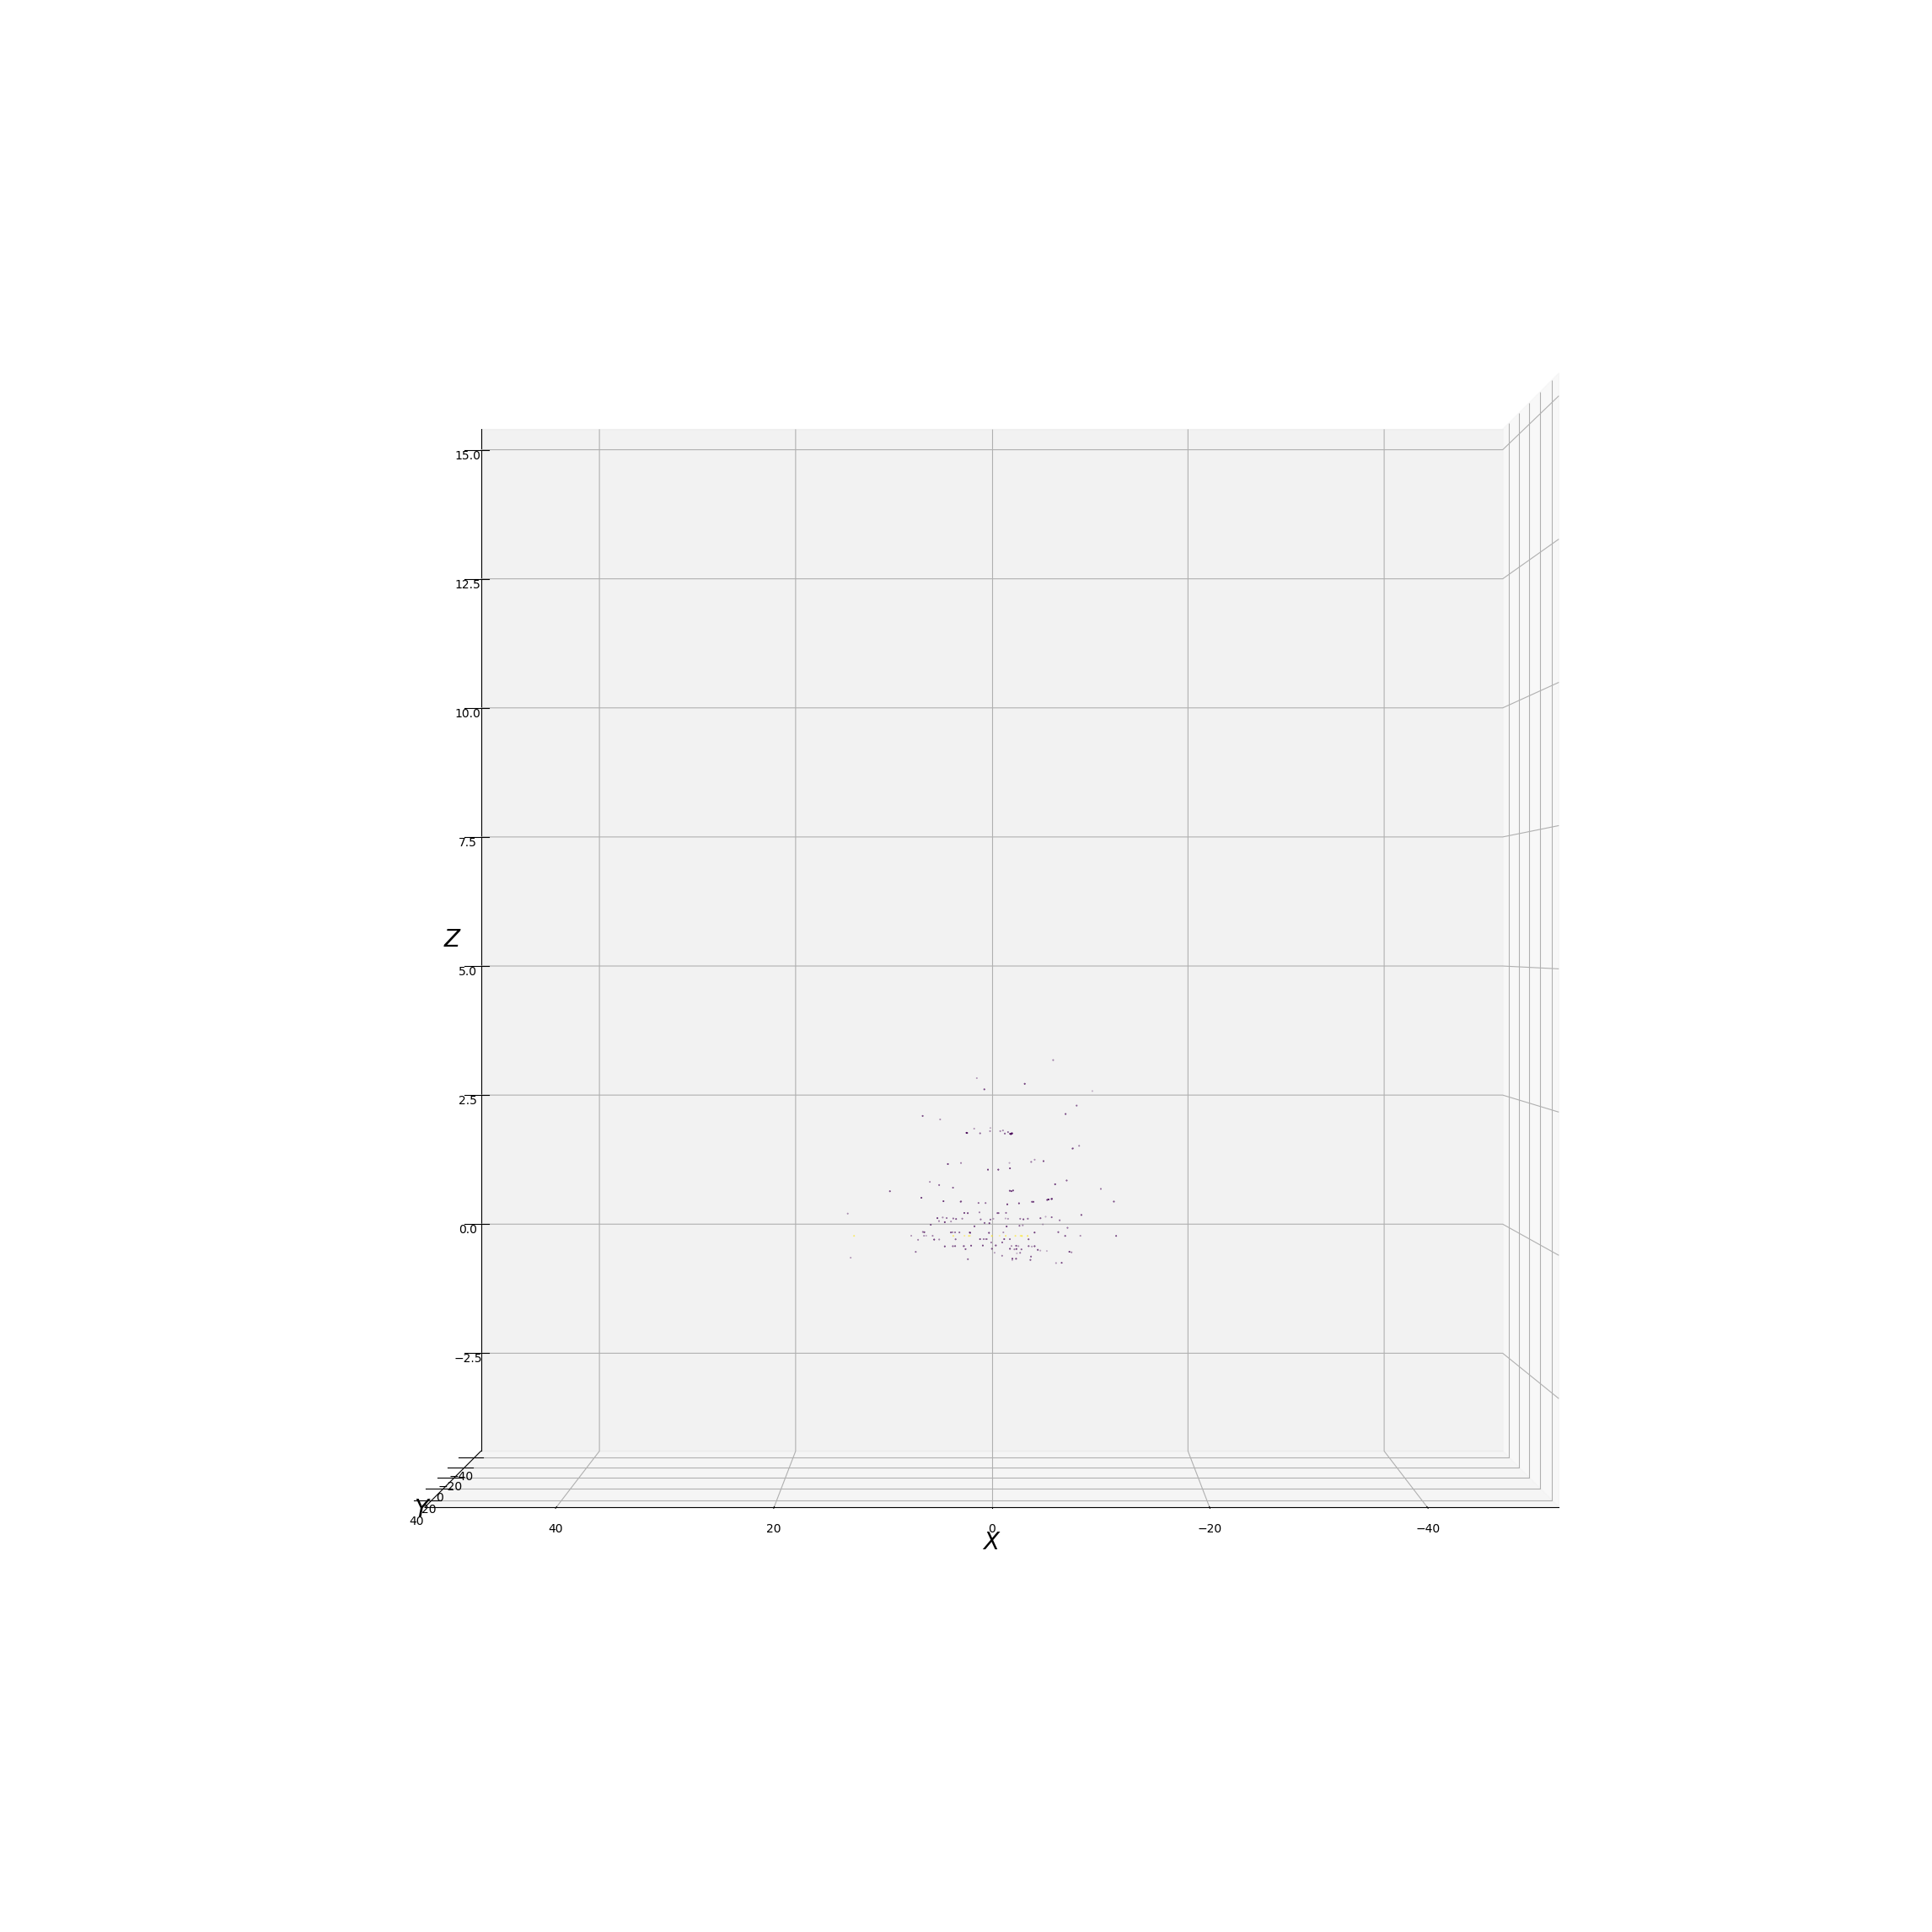

In [488]:
plot(snow_outliers, x_range, y_range, z_range, view=(0, 90), point_size=0.2)

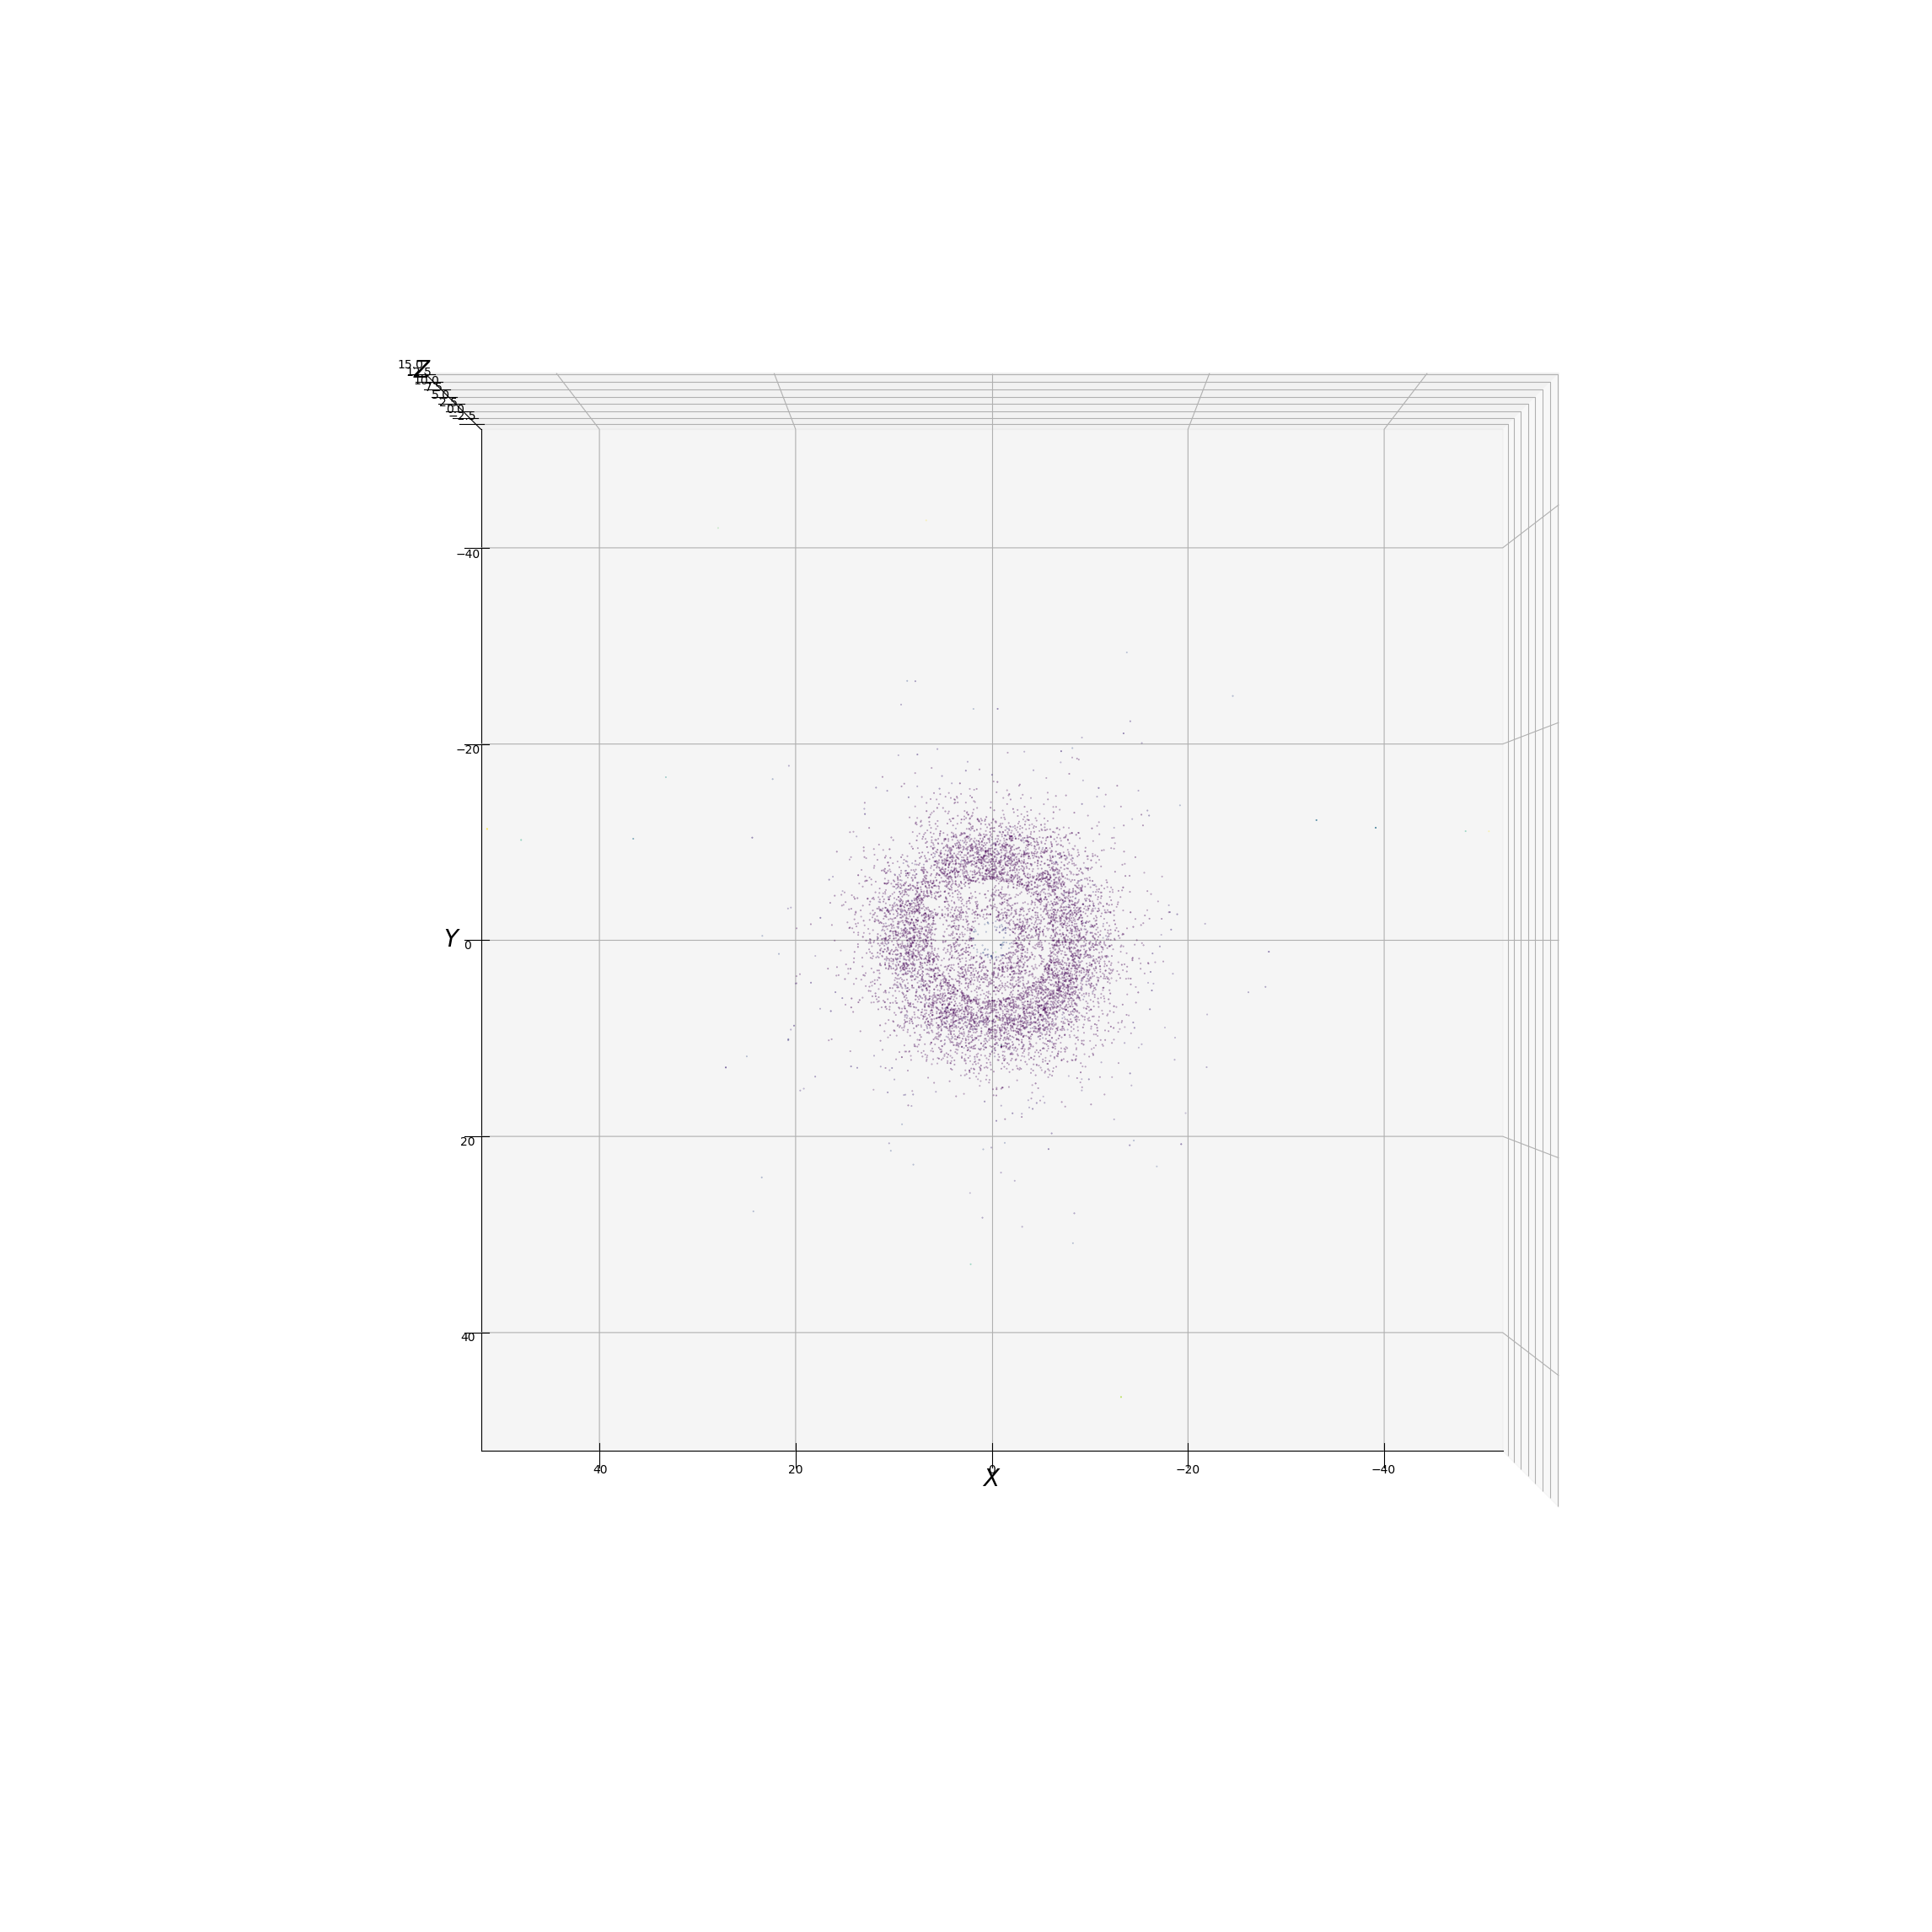

In [489]:
plot(snow_points, x_range, y_range, z_range, view=(90, 90))

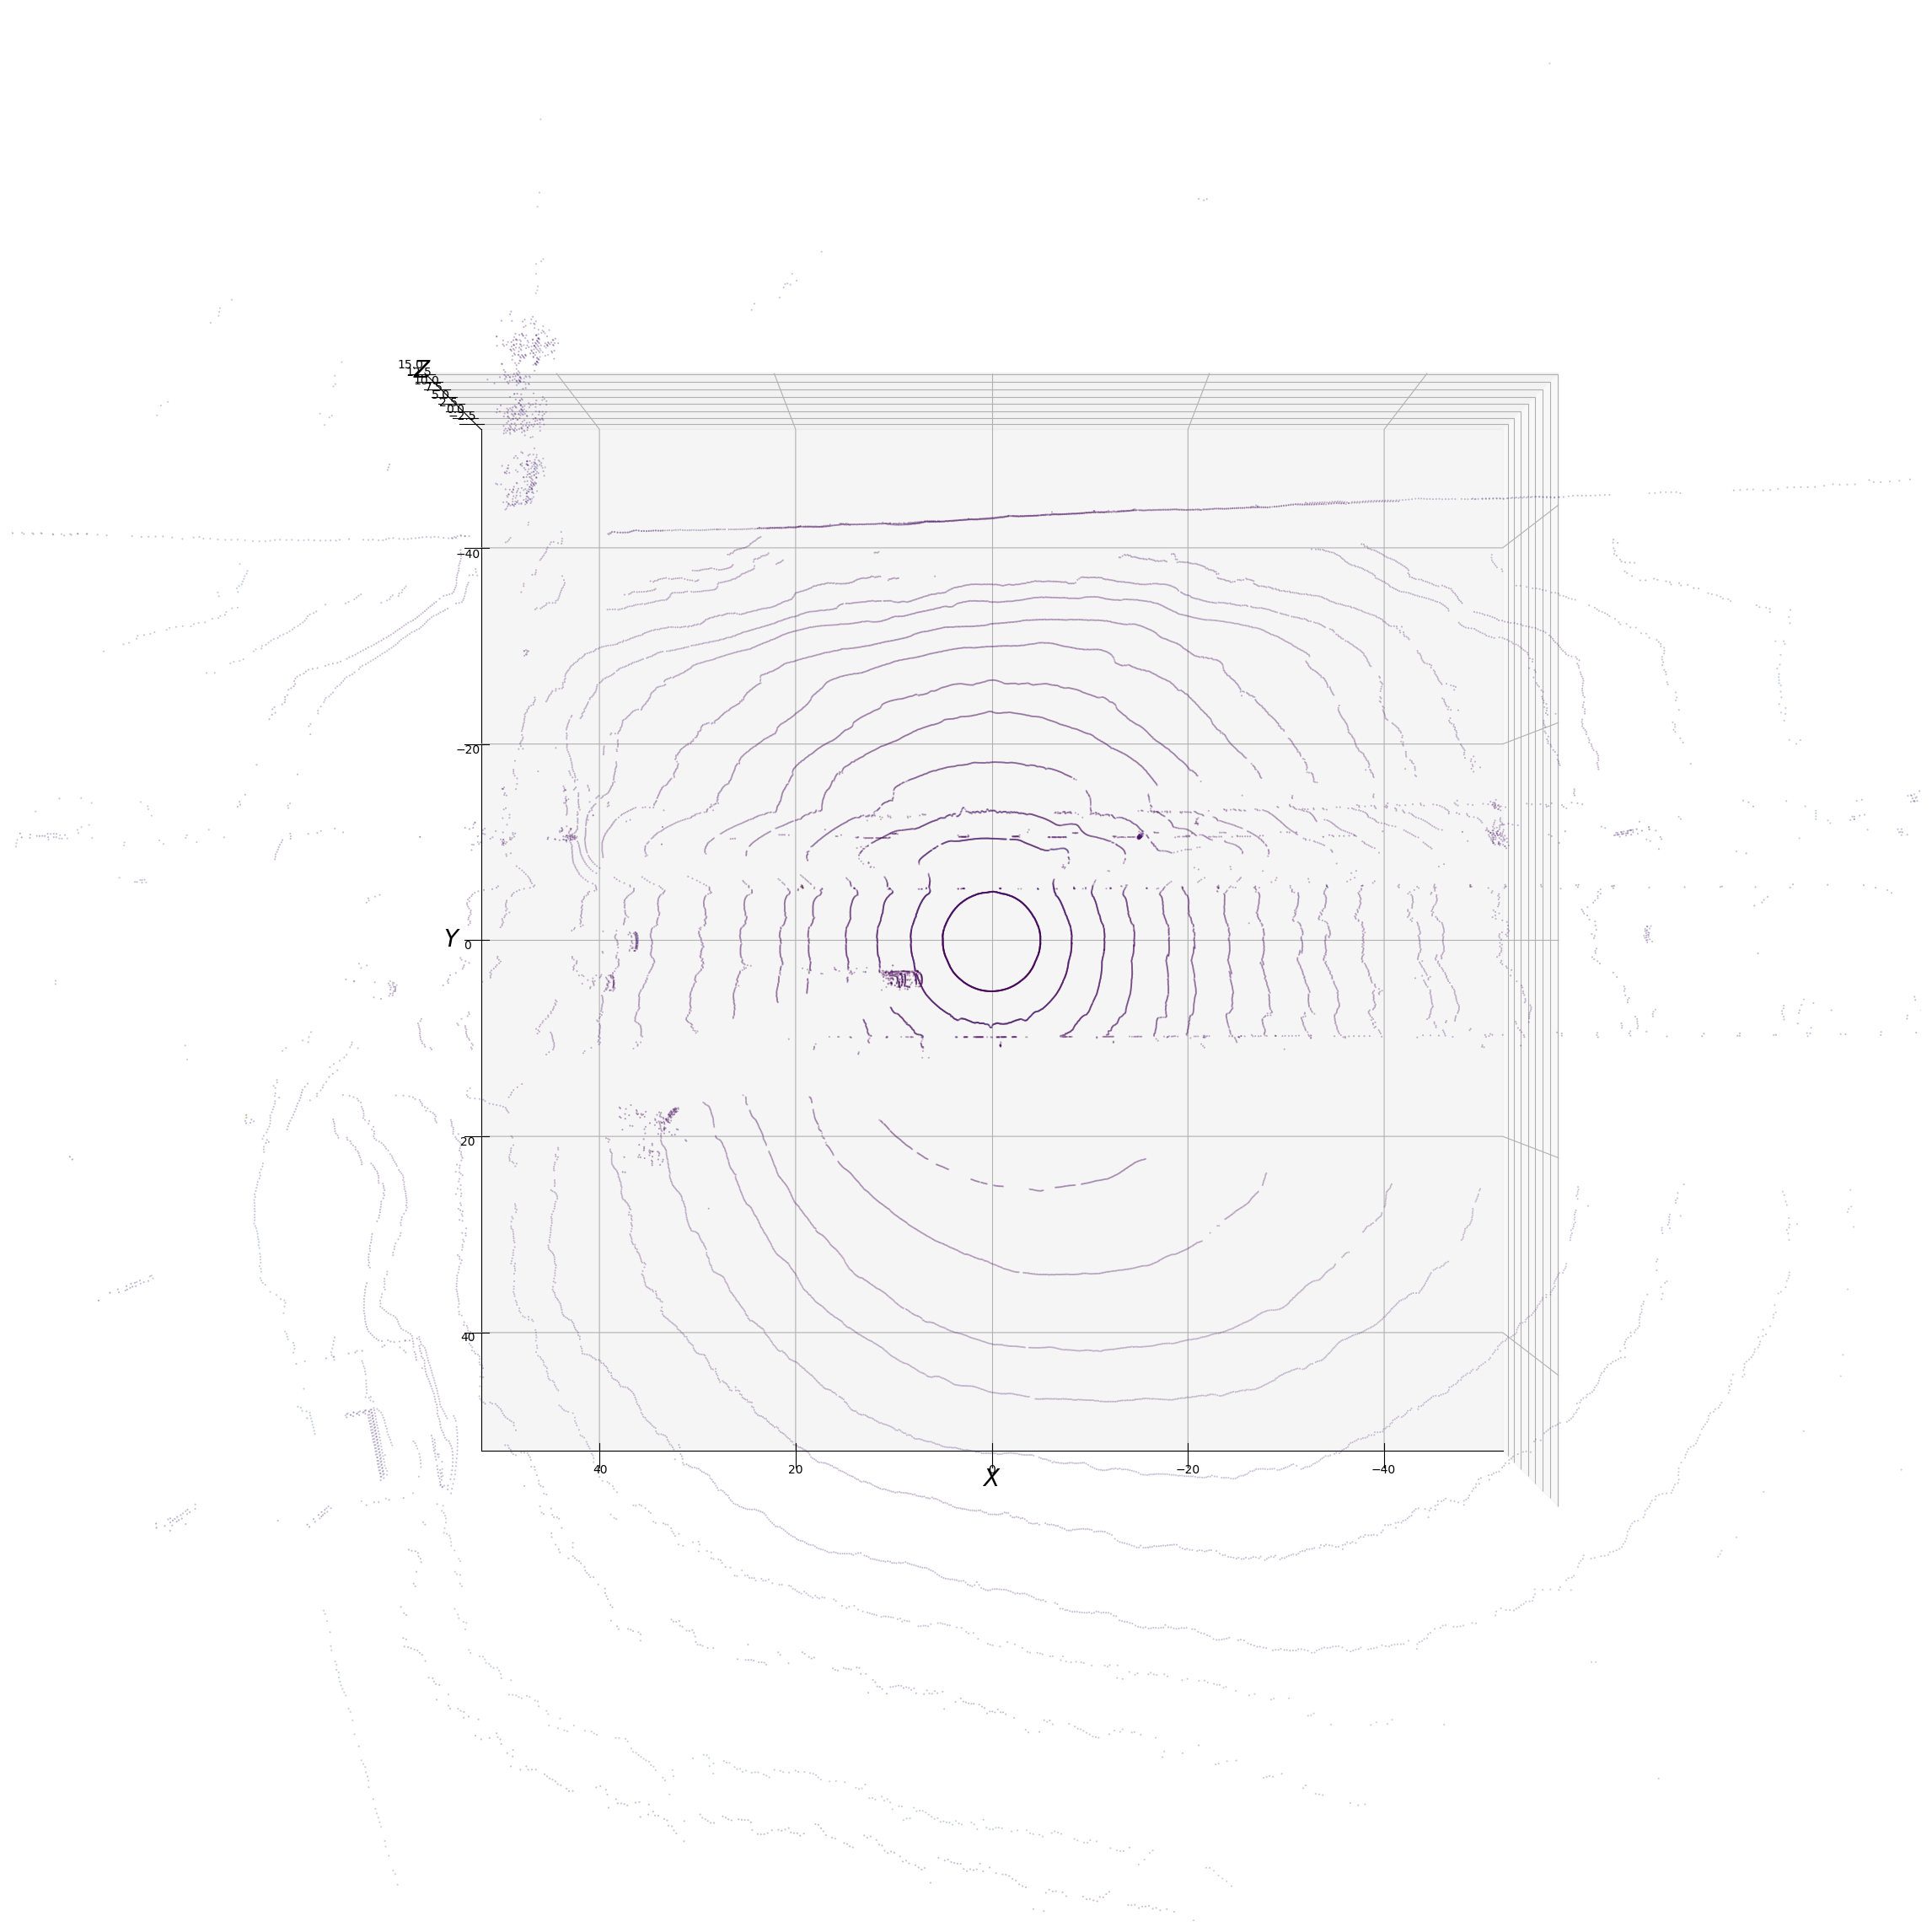

In [490]:
plot(removed_points, x_range, y_range, z_range, view=(90, 90))

In [ ]:
plot(trimmed_lidar_data, x_range, y_range, z_range, view=(0, -90))

In [ ]:
plot(lidar_data, x_range, y_range, z_range, view=(0, 0))

In [10]:
def get_distributions(points):
    distance_distribution = []
    intensity_distribution = []
    distance_per_intensity = {}
    n_bins = points.shape[0]

    for i in range(n_bins):
        distance = np.sqrt(points[i, 0]**2 + points[i, 1]**2 + points[i, 2]**2)
        intensity = points[i, 3]

        distance_distribution.append(distance) 
        intensity_distribution.append(intensity)

        distances = distance_per_intensity.get(intensity, [])
        distances.append(distance)
        distance_per_intensity[intensity] = distances
    
    distributions = {
        "distance_distribution": distance_distribution,
        "intensity_distribution": intensity_distribution,
        "distance_per_intensity": distance_per_intensity,
        "n_bins": n_bins
    }
    return distributions

In [11]:
def ecdf(data):
    l = len(data)
    x = np.sort(data)
    y = (np.arange(l) + 1)/l
    return x, y

In [12]:
def plot_cdf_distance_per_intensity(distance_per_intensity):
    fig, ax = plt.subplots(figsize=(8, 4))

    labels = []
    for i, intensity in enumerate(sorted(list(distance_per_intensity.keys()))[:]):
        ax.plot(*ecdf(distance_per_intensity[intensity]))
    #     n, bins, patches = ax.hist(distance_per_intensity[i], bins=len(distance_per_intensity[i]), density=True, histtype='step', cumulative=True, label='Empirical')
    
        labels.append("[i:"+ str(i) +"] " + "[count:" + str(len(distance_per_intensity[intensity])) + "] " + str(intensity))

    plt.legend(labels, bbox_to_anchor=(1,1), loc="upper left")
    ax.grid(True)
    ax.set_title('Cummulative Density of Distances per Intensities')
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('CDF')
    plt.show()

In [13]:
def plot_cdf(distributions, title, xlabel, ylabel):
#     fig, (ax, ax_theoretical) = plt.subplots(1, 2, figsize=(20, 5))
    fig, (ax, ax_theoretical) = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
#     fig, ax = plt.subplots(figsize=(8, 4))
    fig.tight_layout(w_pad=15)
    labels = []
    labels_theoretical = []
    
    for distribution, dist_label in distributions:
        ax.plot(*ecdf(distribution))
#         ax.hist(distribution, bins=len(distribution), density=True, histtype='step', cumulative=True)

        labels.append(dist_label)
    
        theoretical = np.random.normal(np.mean(distribution), np.std(distribution), len(distribution))
        ax_theoretical.plot(*ecdf(theoretical))
    
    ax_theoretical.legend(labels, bbox_to_anchor=(1,1), loc="upper left")
    ax_theoretical.grid(True)
    ax_theoretical.set_title(title)
    ax_theoretical.set_xlabel(xlabel)
    ax_theoretical.set_ylabel(ylabel)
    ax_theoretical.set_title("Theoretical " + title)

    ax.grid(True)
    ax.set_title("Empirical " + title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(labels, bbox_to_anchor=(1,1), loc="upper left")
    plt.show()

In [491]:
snow_distributions = get_distributions(snow_points)
removed_points_distributions = get_distributions(removed_points)
trimmed_points_distributions = get_distributions(trimmed_lidar_data)
all_points_distributions = get_distributions(lidar_data)


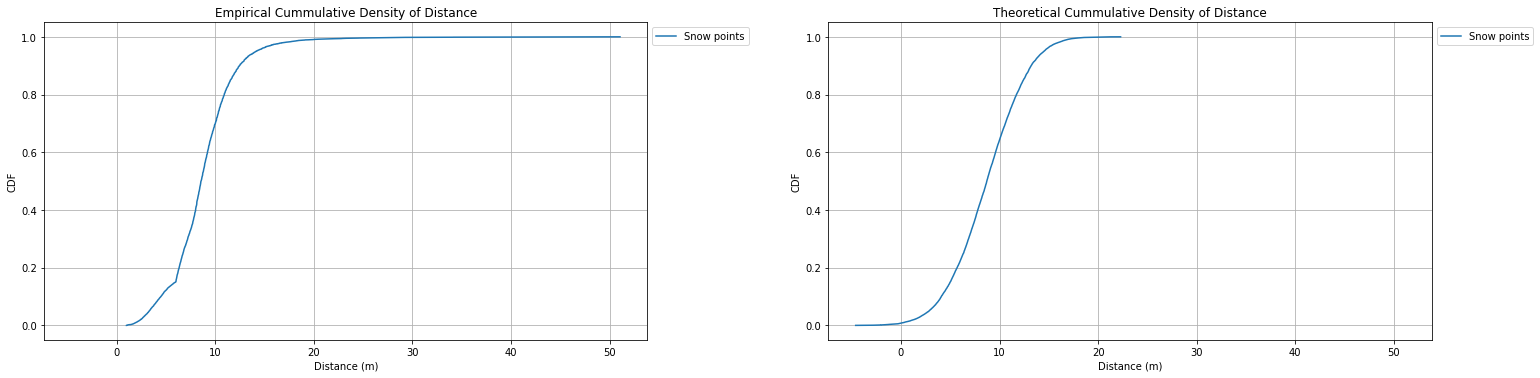

In [492]:
plot_cdf([(snow_distributions["distance_distribution"], "Snow points")],
                 title='Cummulative Density of Distance',
                 xlabel='Distance (m)',
                 ylabel='CDF')

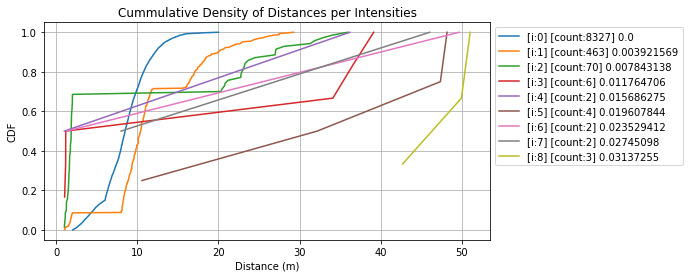

In [493]:
plot_cdf_distance_per_intensity(snow_distributions['distance_per_intensity'])

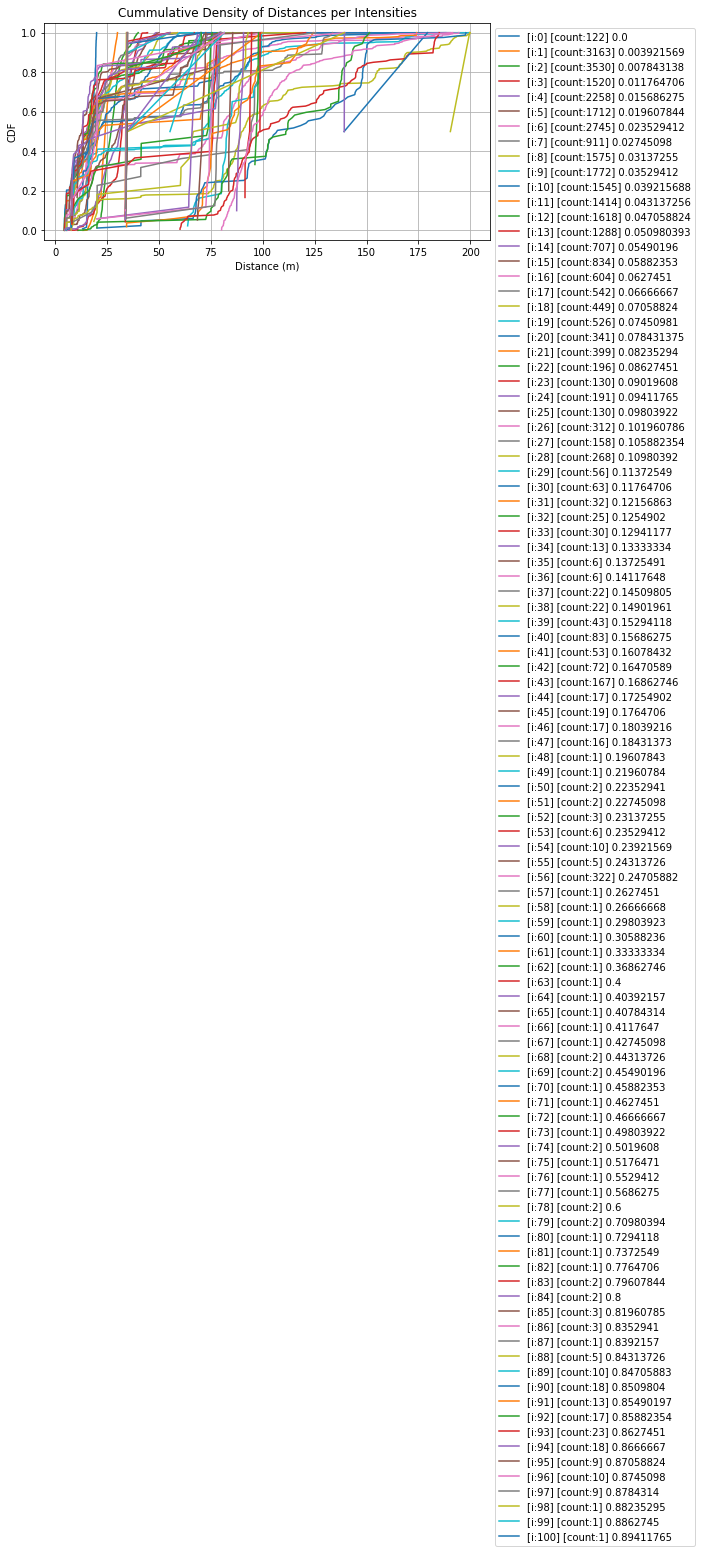

In [248]:
plot_cdf_distance_per_intensity(removed_points_distributions['distance_per_intensity'])

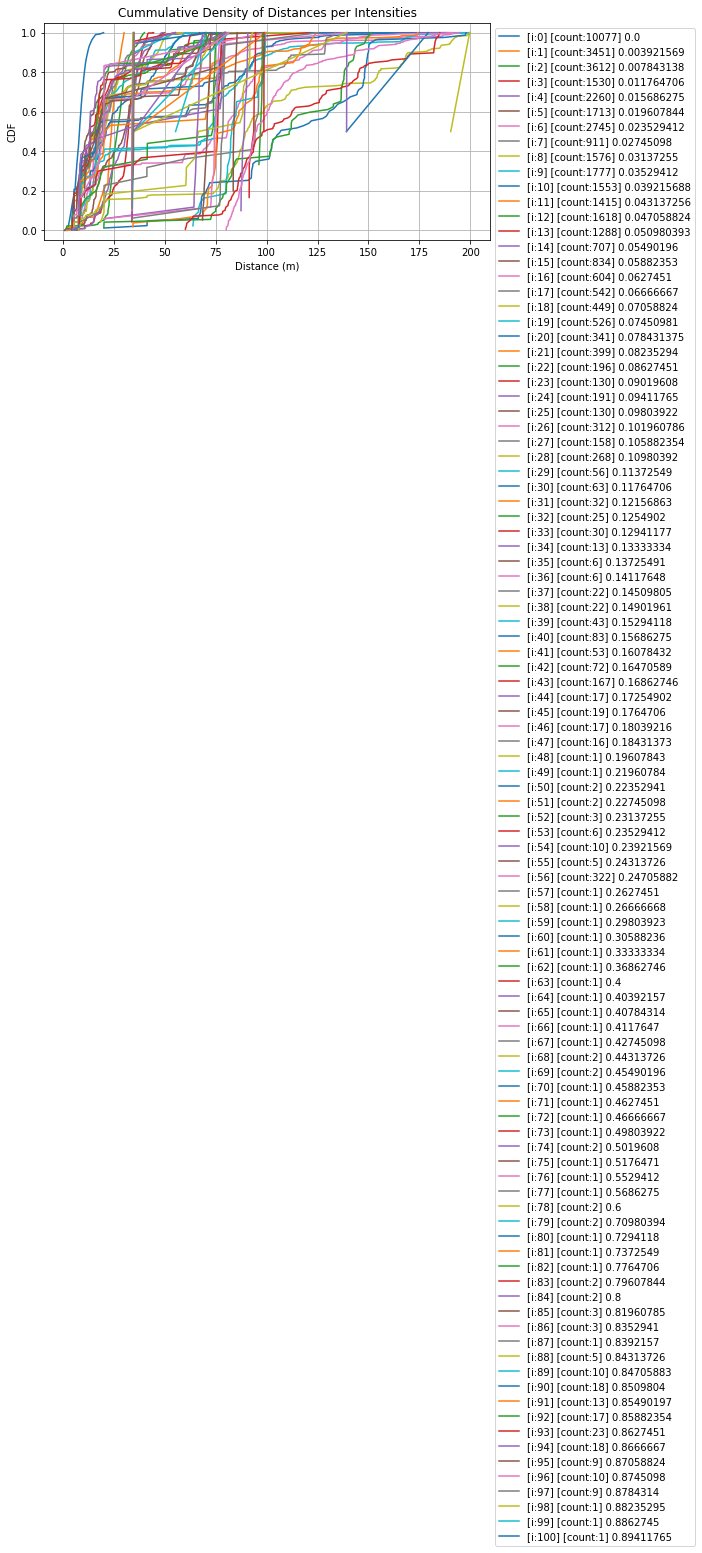

In [249]:
plot_cdf_distance_per_intensity(all_points_distributions['distance_per_intensity'])

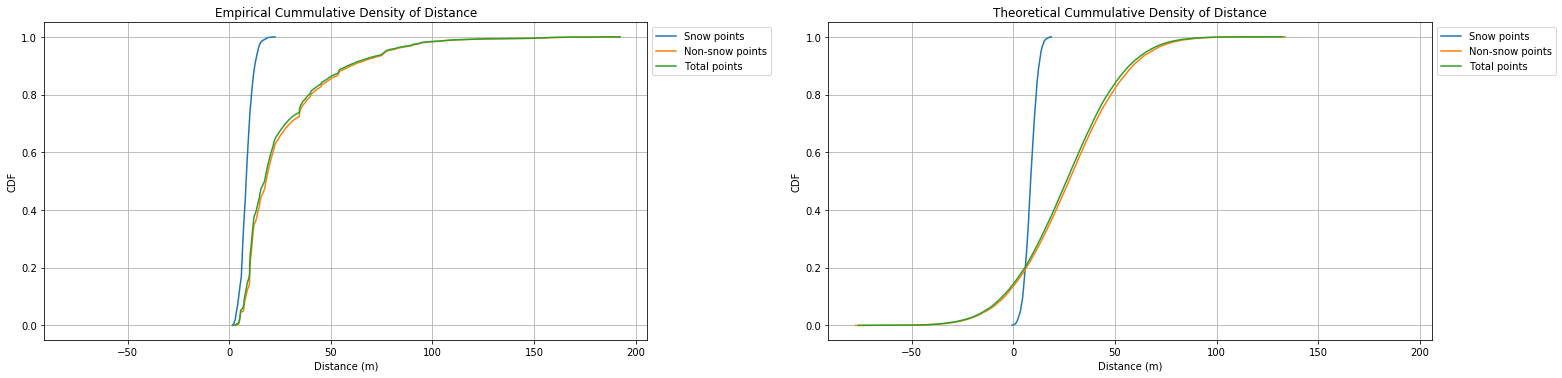

In [552]:
plot_cdf([(snow_distributions["distance_distribution"], "Snow points"), 
                   (removed_points_distributions["distance_distribution"], "Non-snow points"),
                   (all_points_distributions["distance_distribution"], "Total points")],
                 title='Cummulative Density of Distance',
                 xlabel='Distance (m)',
                 ylabel='CDF')

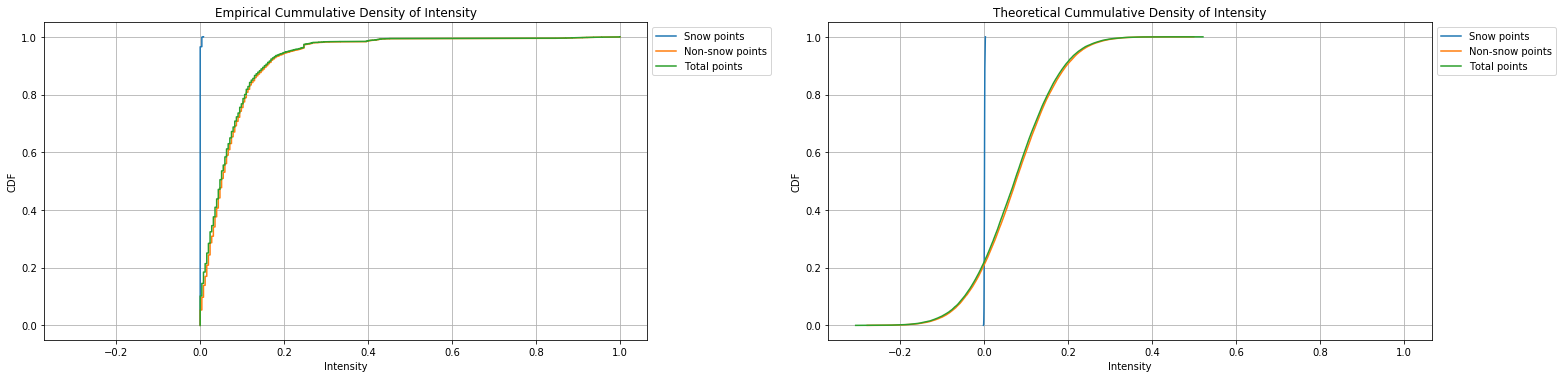

In [553]:
plot_cdf([(snow_distributions["intensity_distribution"], "Snow points"), 
                   (removed_points_distributions["intensity_distribution"], "Non-snow points"),
                   (all_points_distributions["intensity_distribution"], "Total points")],
                 title='Cummulative Density of Intensity',
                 xlabel='Intensity',
                 ylabel='CDF')

In [39]:
def plot_distance_vs_intensity(snow_distribution_dist, snow_distribution_int, non_snow_distribution_dist, non_snow_distribution_int, xlim=None, ylim=None):
    plt.subplots(figsize=(18,5))
    plt.scatter(snow_distribution_int, snow_distribution_dist, 0.5, alpha=0.5, label='snow', zorder=2)
    plt.scatter(non_snow_distribution_int, non_snow_distribution_dist, 0.5, alpha=0.5, label='non-snow', zorder=1)
    plt.legend()
    plt.xlabel('Intensity')
    plt.ylabel('Distance [m]')
    
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
        
    plt.title("Distance vs. Intensity")
        
    plt.show()

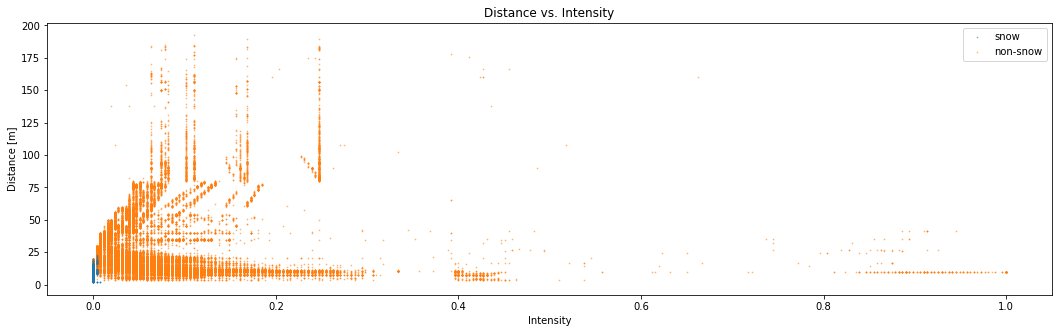

In [40]:
plot_distance_vs_intensity(snow_distributions["distance_distribution"], snow_distributions["intensity_distribution"], 
                           removed_points_distributions["distance_distribution"], removed_points_distributions["intensity_distribution"])

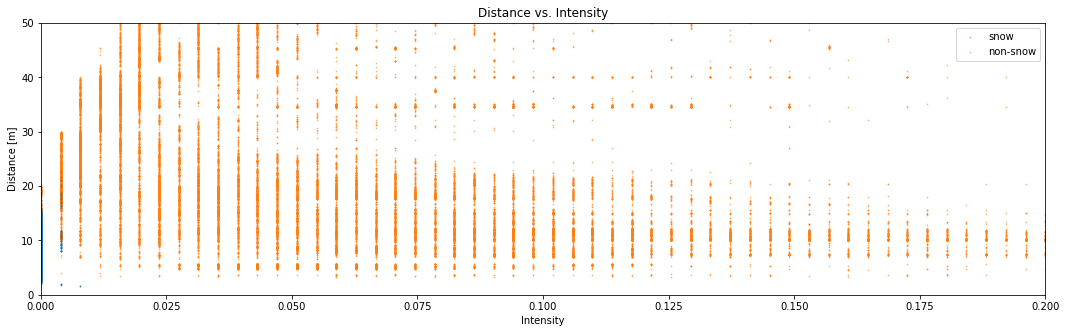

In [41]:
plot_distance_vs_intensity(snow_distributions["distance_distribution"], snow_distributions["intensity_distribution"], 
                           removed_points_distributions["distance_distribution"], removed_points_distributions["intensity_distribution"],
                          xlim=[0.0, 0.2], ylim=[0, 50])

In [273]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics

snow_distance = snow_distributions["distance_distribution"]
snow_intensity = snow_distributions["intensity_distribution"]
non_snow_distance = removed_points_distributions["distance_distribution"]
non_snow_intensity = removed_points_distributions["intensity_distribution"]

x = np.vstack((np.concatenate((snow_intensity, non_snow_intensity)), np.concatenate((snow_distance, non_snow_distance)))).T
y = np.concatenate((np.zeros(len(snow_distance)), np.ones(len(non_snow_distance))))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf_frame_1 = svm.SVC(kernel='linear')
clf_frame_1.fit(x_train, y_train)

print("accuracy [frame " + str(frame_id) + "]:",metrics.accuracy_score(y_test, clf_frame_1.predict(x_test)))

accuracy [frame 0]: 0.9871616561463571


In [136]:
snow_distance = snow_distributions["distance_distribution"]
snow_intensity = snow_distributions["intensity_distribution"]
non_snow_distance = removed_points_distributions["distance_distribution"]
non_snow_intensity = removed_points_distributions["intensity_distribution"]

x = np.vstack((np.concatenate((snow_intensity, non_snow_intensity)), np.concatenate((snow_distance, non_snow_distance)))).T
y = np.concatenate((np.zeros(len(snow_distance)), np.ones(len(non_snow_distance))))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("accuracy [frame " + str(frame_id) + "]:",metrics.accuracy_score(y_test, clf_frame_1.predict(x_test)))

accuracy [frame 1]: 0.9879812805786004


In [275]:
snow_distance = snow_distributions["distance_distribution"]
snow_intensity = snow_distributions["intensity_distribution"]
non_snow_distance = removed_points_distributions["distance_distribution"]
non_snow_intensity = removed_points_distributions["intensity_distribution"]

x = np.vstack((np.concatenate((snow_intensity, non_snow_intensity)), np.concatenate((snow_distance, non_snow_distance)))).T
y = np.concatenate((np.zeros(len(snow_distance)), np.ones(len(non_snow_distance))))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("accuracy [frame " + str(frame_id) + "]:",metrics.accuracy_score(y_test, clf_frame_1.predict(x_test)))

accuracy [frame 400]: 0.9879105595378196


In [407]:
snow_distance = snow_distributions["distance_distribution"]
snow_intensity = snow_distributions["intensity_distribution"]
non_snow_distance = removed_points_distributions["distance_distribution"]
non_snow_intensity = removed_points_distributions["intensity_distribution"]

x = np.vstack((np.concatenate((snow_intensity, non_snow_intensity)), np.concatenate((snow_distance, non_snow_distance)))).T
y = np.concatenate((np.zeros(len(snow_distance)), np.ones(len(non_snow_distance))))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("accuracy [seq "+ str(seq) + ", frame " + str(frame_id) + "]:",metrics.accuracy_score(y_test, clf_frame_1.predict(x_test)))

accuracy [seq 0078, frame 325]: 0.9440715883668904


In [556]:
snow_distance = snow_distributions["distance_distribution"]
snow_intensity = snow_distributions["intensity_distribution"]
non_snow_distance = removed_points_distributions["distance_distribution"]
non_snow_intensity = removed_points_distributions["intensity_distribution"]

x = np.vstack((np.concatenate((snow_intensity, non_snow_intensity)), np.concatenate((snow_distance, non_snow_distance)))).T
y = np.concatenate((np.zeros(len(snow_distance)), np.ones(len(non_snow_distance))))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("accuracy [seq "+ str(seq) + ", frame " + str(frame_id) + "]:",metrics.accuracy_score(y_test, clf_frame_1.predict(x_test)))

accuracy [seq 0016, frame 90]: 0.9365219958665486


In [569]:
predicted = clf_frame_1.predict(x)

In [570]:
x_pointcloud = np.vstack((snow_points, removed_points))
predicted_snowpoints = []
predicted_non_snow_points = []
for i, (intensity, distance) in enumerate(x):
    if predicted[i] == 0:
        predicted_snowpoints.append(x_pointcloud[i])
    else:
        predicted_non_snow_points.append(x_pointcloud[i])
        
predicted_snowpoints = np.asarray(predicted_snowpoints)
predicted_non_snow_points = np.asarray(predicted_non_snow_points)

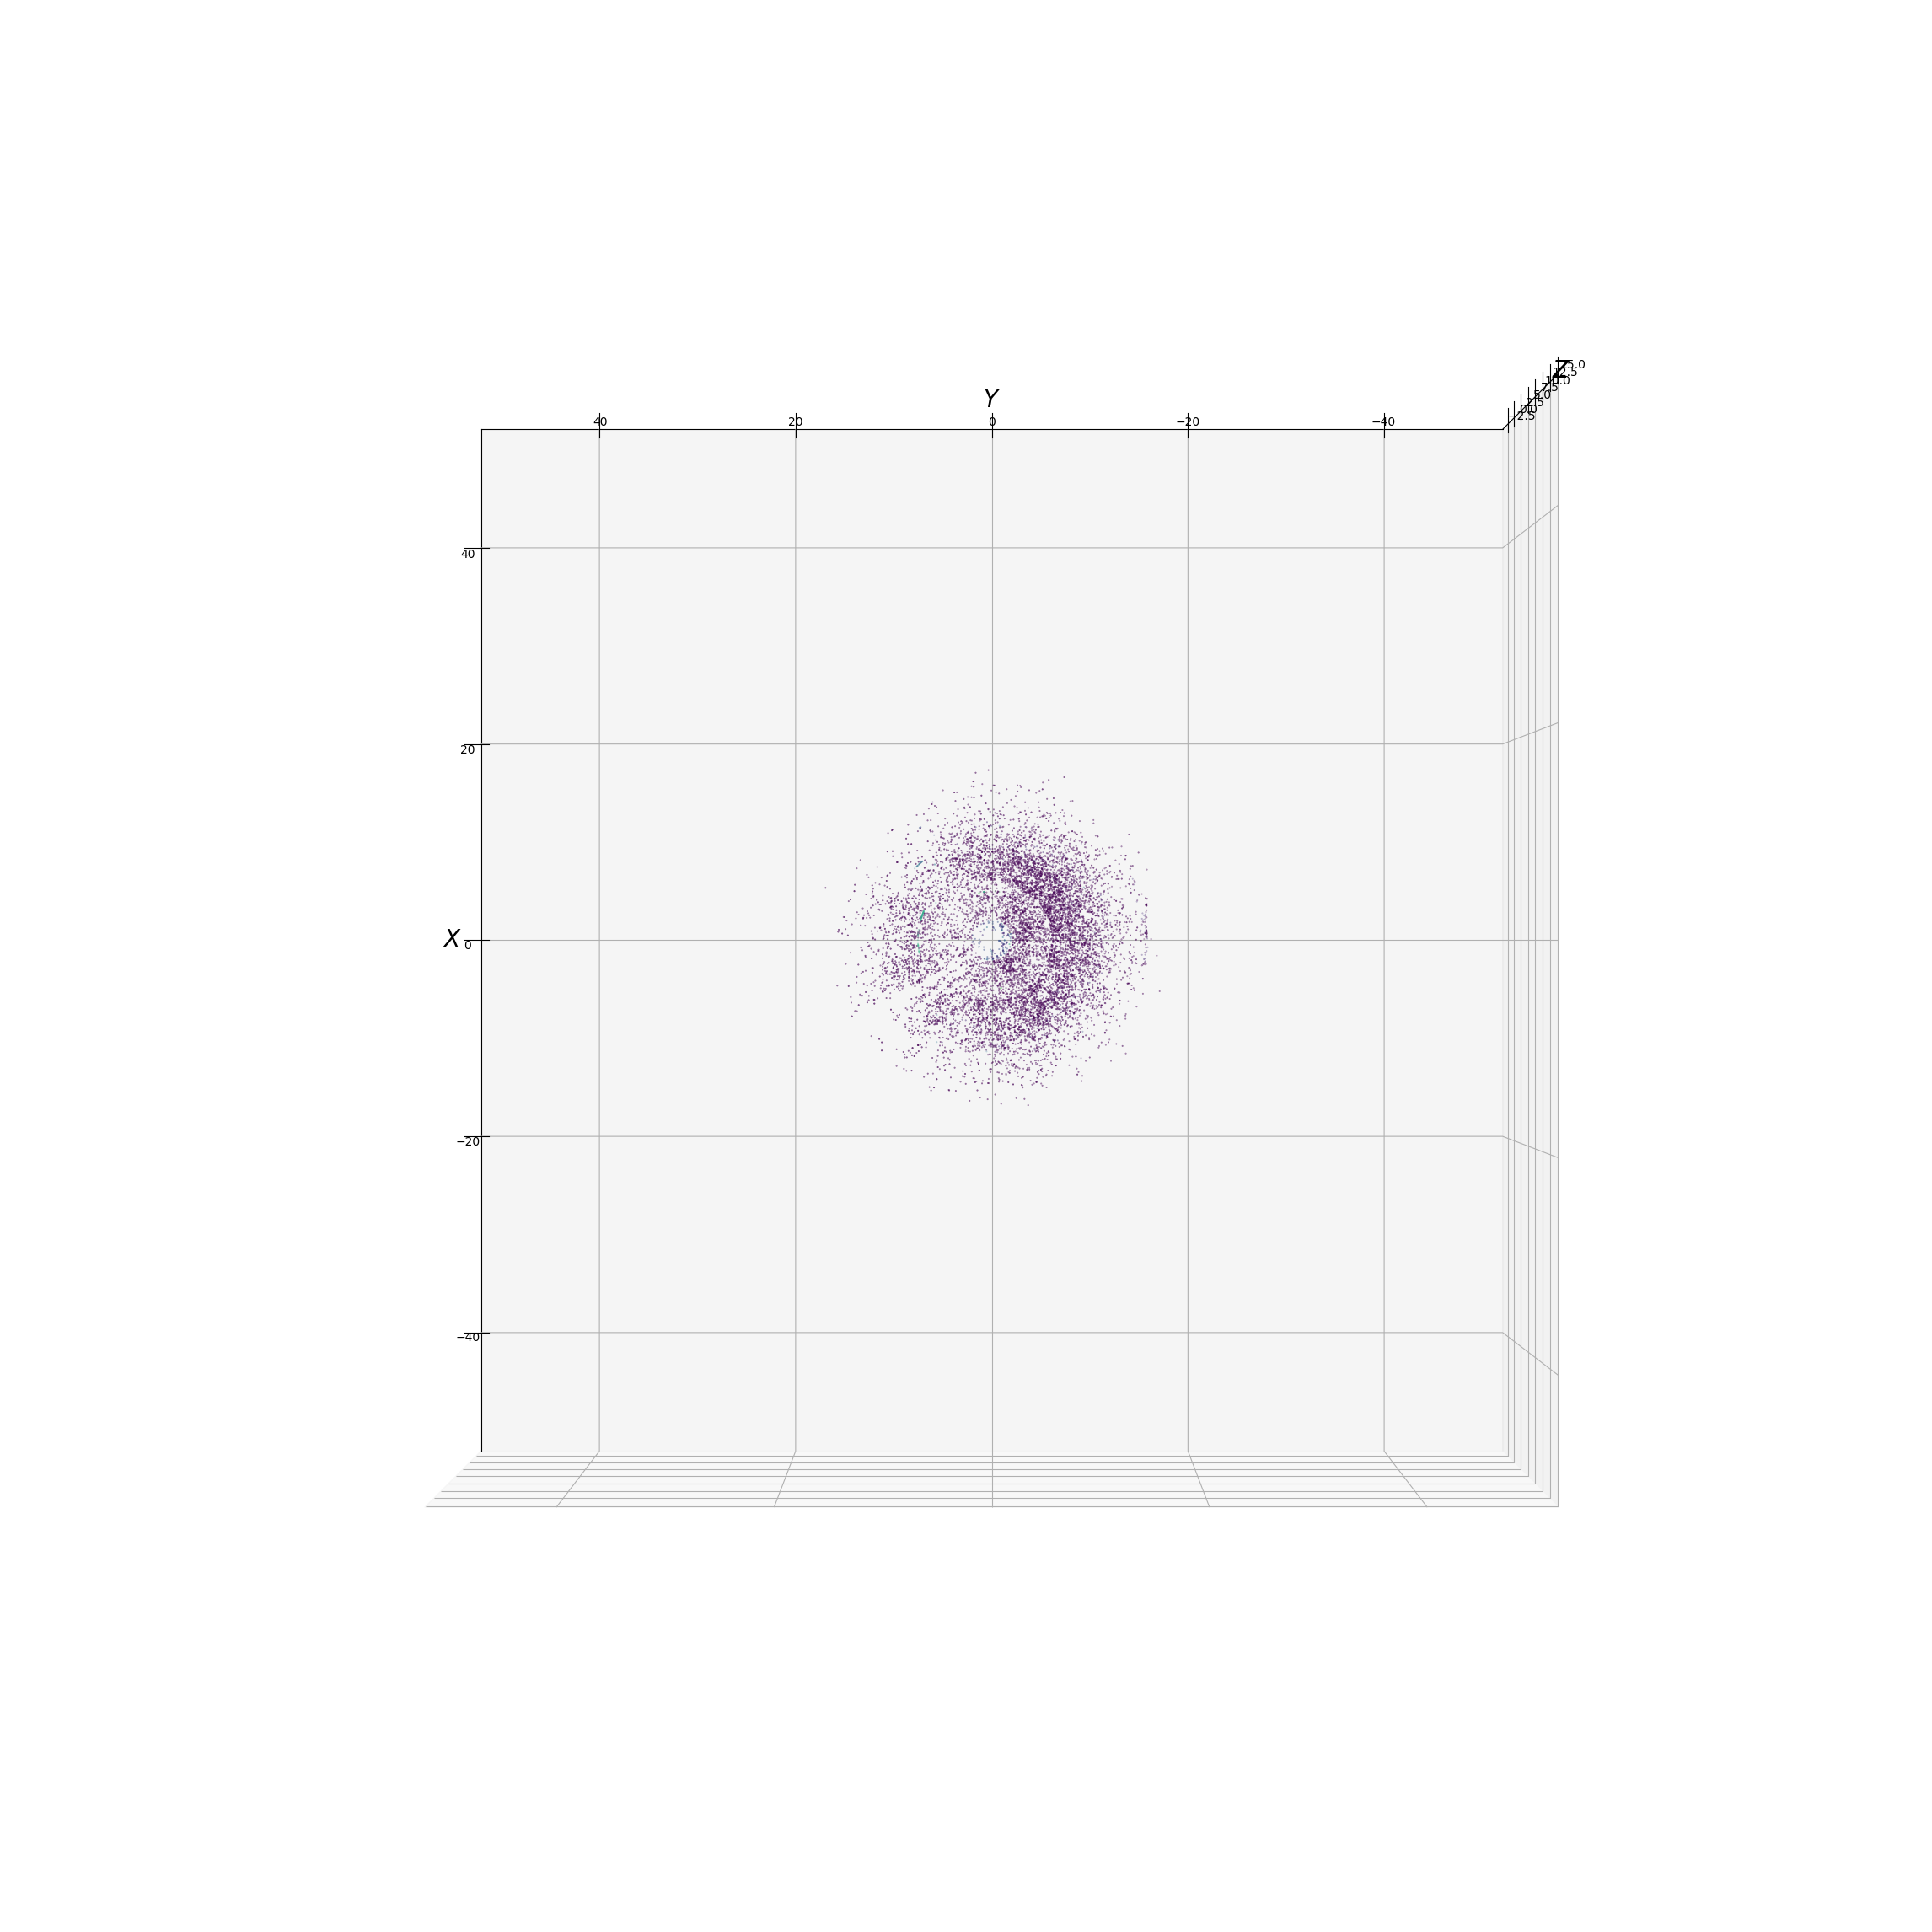

In [574]:
plot(predicted_snowpoints, x_range, y_range, z_range, view=(90, 180))

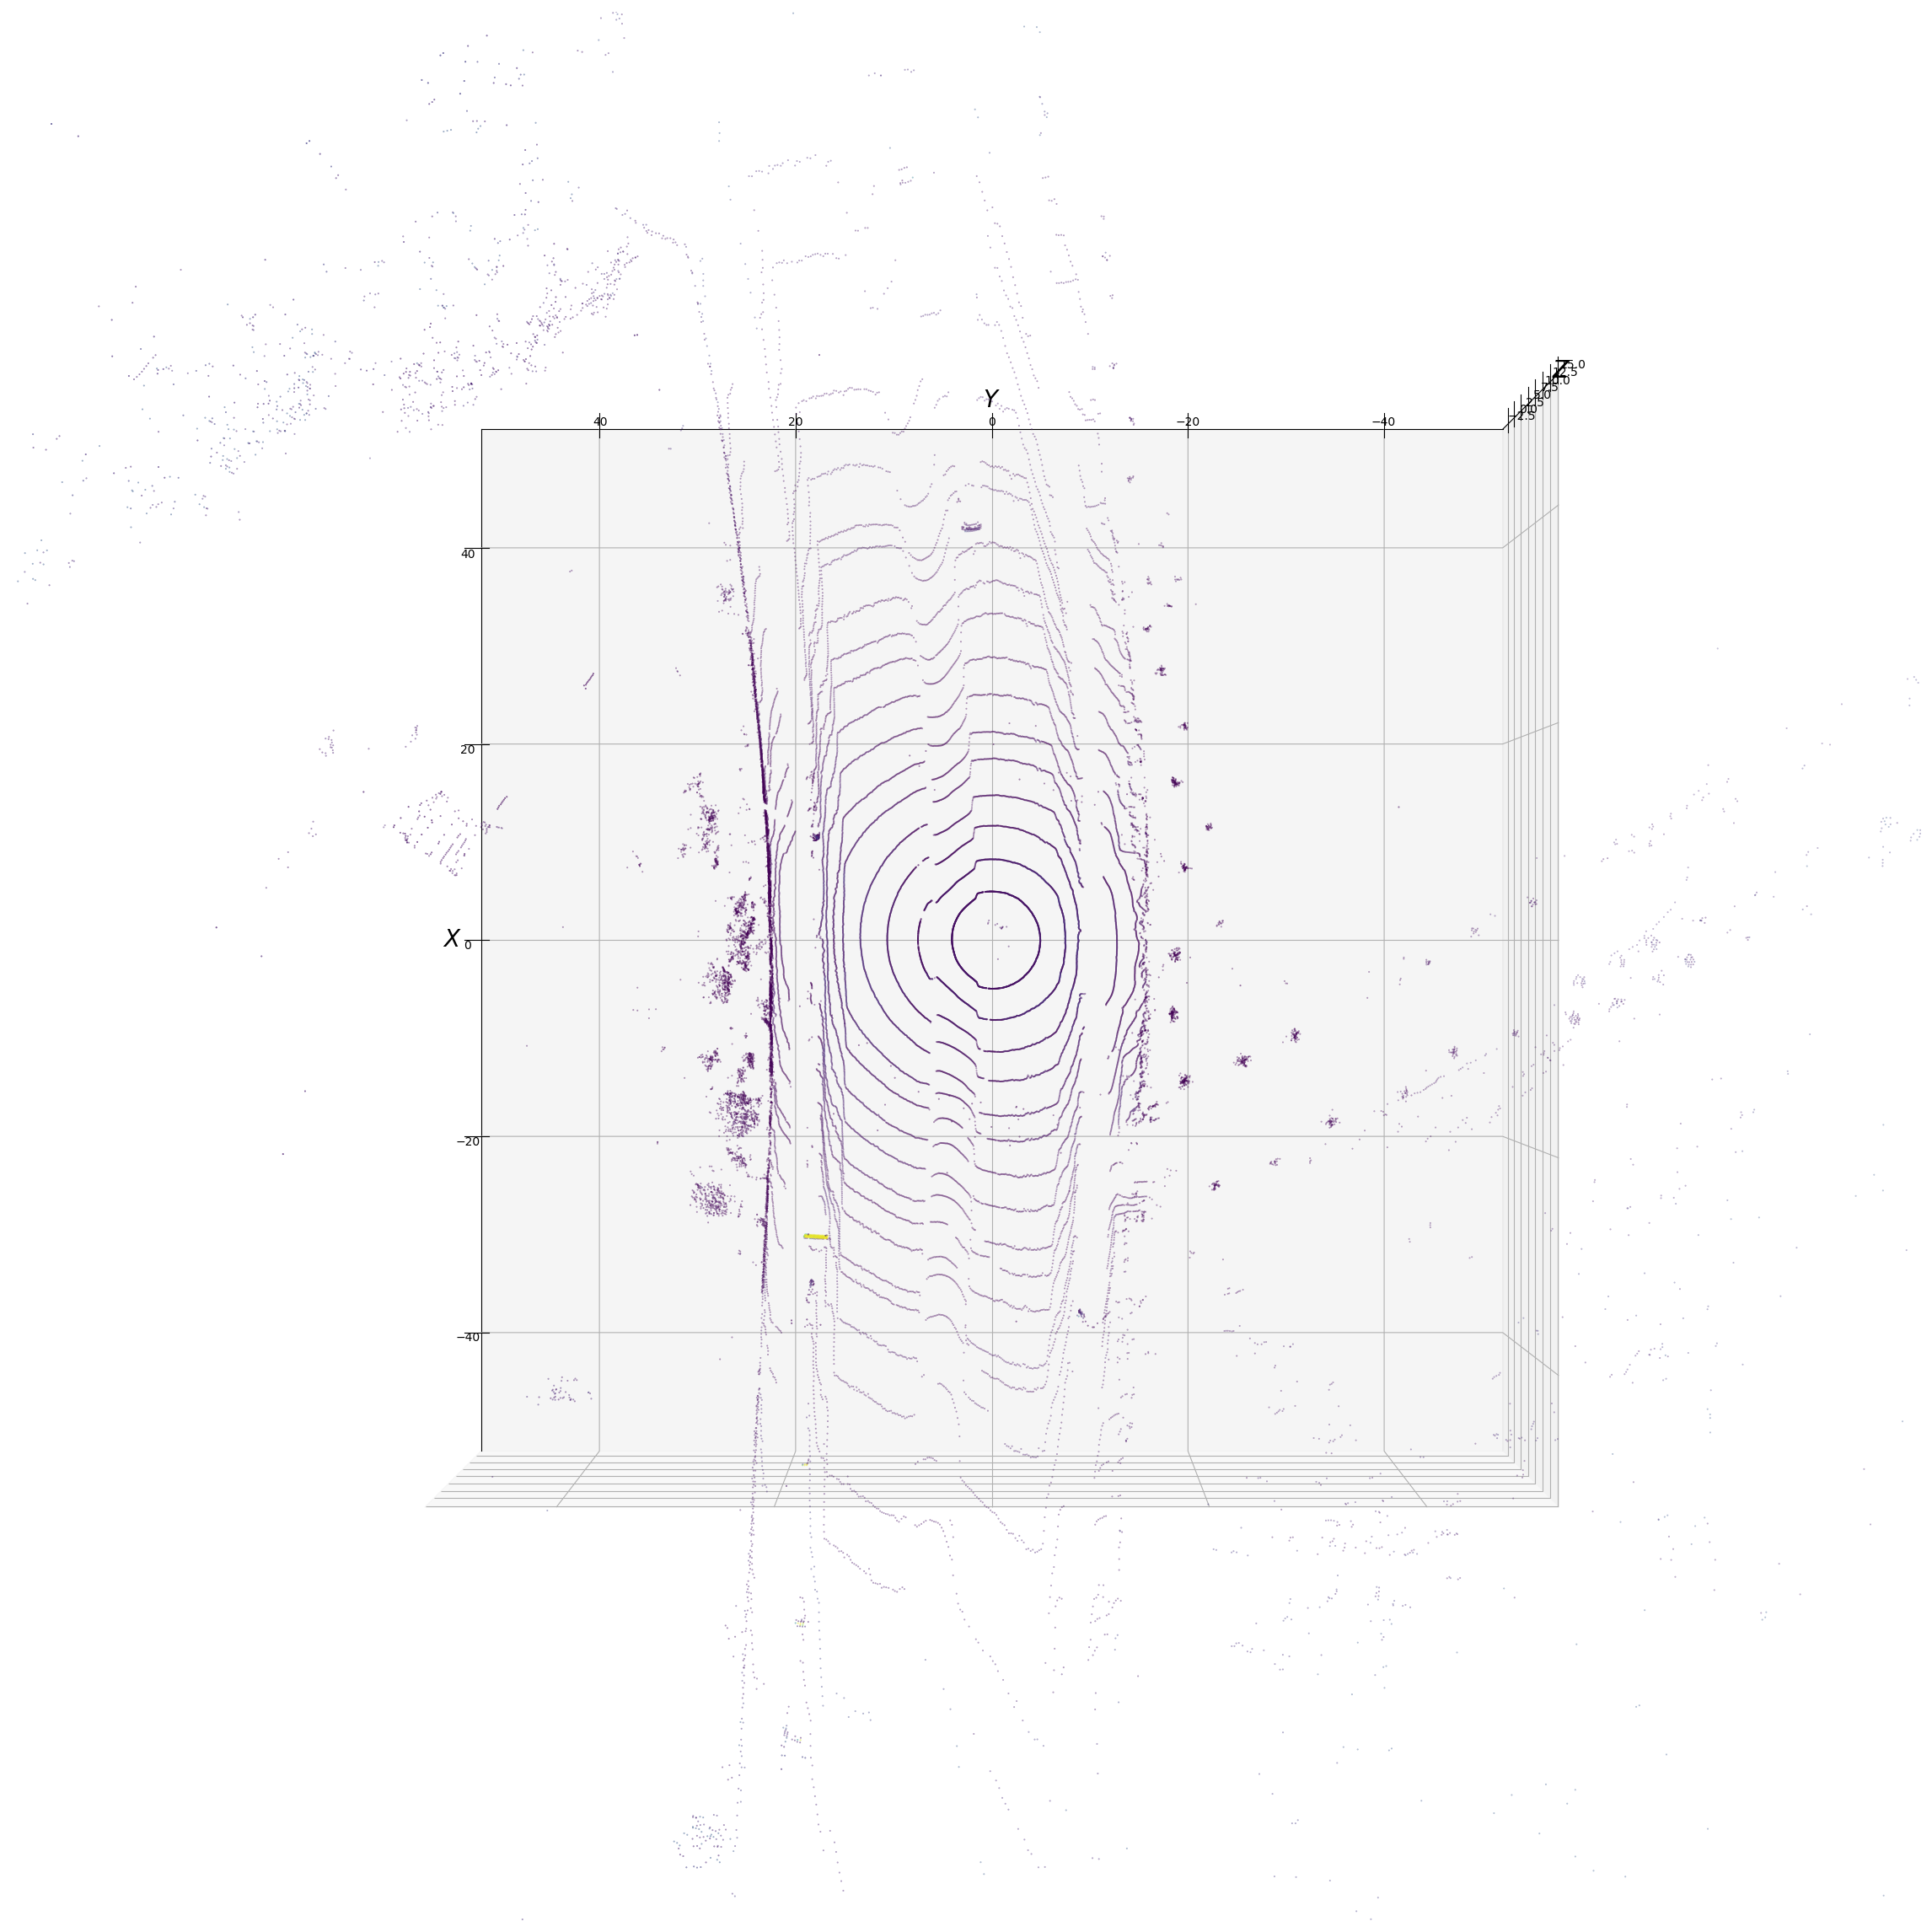

In [575]:
plot(predicted_non_snow_points, x_range, y_range, z_range, view=(90, 180))

In [27]:
from sklearn import svm, metrics

snow_distance = snow_distributions["distance_distribution"]
snow_intensity = snow_distributions["intensity_distribution"]
non_snow_distance = removed_points_distributions["distance_distribution"]
non_snow_intensity = removed_points_distributions["intensity_distribution"]

train_x = np.vstack((np.concatenate((snow_intensity, non_snow_intensity)), np.concatenate((snow_distance, non_snow_distance)))).T
train_y = np.concatenate((np.zeros(len(snow_distance)), np.ones(len(non_snow_distance))))

clf = svm.SVC(kernel='linear')
clf.fit(train_x, train_y)

print("accuracy:",metrics.accuracy_score(train_y, clf.predict(train_x)))

accuracy: 0.9864971860221267


In [13]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics

snow_distance = snow_distributions["distance_distribution"]
snow_intensity = snow_distributions["intensity_distribution"]
non_snow_distance = removed_points_distributions["distance_distribution"]
non_snow_intensity = removed_points_distributions["intensity_distribution"]

x = np.vstack((np.concatenate((snow_intensity, non_snow_intensity)), np.concatenate((snow_distance, non_snow_distance)))).T
y = np.concatenate((np.zeros(len(snow_distance)), np.ones(len(non_snow_distance))))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
len(x_train)

40640

In [44]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

print("accuracy:",metrics.accuracy_score(y_test, clf.predict(x_test)))

accuracy: 0.9649640783387462


In [ ]:
clf = svm.SVC(kernel='poly', degree=3, verbose=True, cache_size=7000)
clf.fit(x_train, y_train)

print("accuracy:",metrics.accuracy_score(y_test, clf.predict(x_test)))

In [127]:
C = 10
gamma = 100000

clf = svm.SVC(kernel='rbf', verbose=True, C=C, gamma=gamma,  cache_size=7000)
clf.fit(x_train, y_train)

print("accuracy:",metrics.accuracy_score(y_test, clf.predict(x_test)))

[LibSVM]accuracy: 0.9838598563133549


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

In [100]:
clf = svm.SVC(kernel='poly', degree=2, verbose=True, cache_size=7000, C=100)
clf.fit(x_train, y_train)

print("accuracy:",metrics.accuracy_score(y_test, clf.predict(x_test)))

[LibSVM]accuracy: 0.9792343273299872


In [115]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

C_range = np.logspace(-2, 3, 3)
gamma_range = np.logspace(3, 5, 3)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(x_train, y_train)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 3.1622776601683795, 'gamma': 100000.0} with a score of 0.99


In [116]:
scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))

In [117]:
scores

array([[0.97844488, 0.97876476, 0.96668307],
       [0.98093012, 0.98388287, 0.98503937],
       [0.98405512, 0.98422736, 0.98469488]])

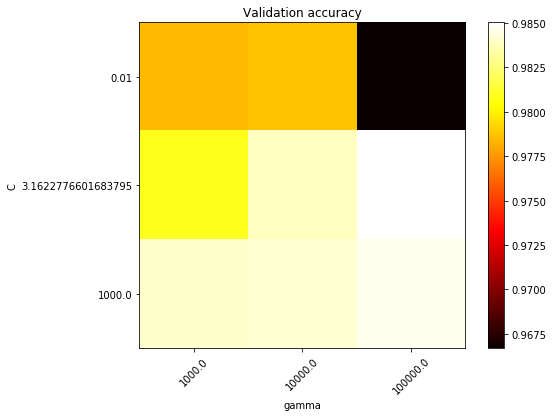

In [118]:
plt.figure(figsize=(8, 6))
plt.imshow(
    scores,
    interpolation="nearest",
    cmap=plt.cm.hot,
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show()

In [47]:
clf = svm.SVC(kernel='sigmoid', verbose=True)
clf.fit(x_train, y_train)

print("accuracy:",metrics.accuracy_score(y_test, clf.predict(x_test)))

[LibSVM]accuracy: 0.9463635468949907


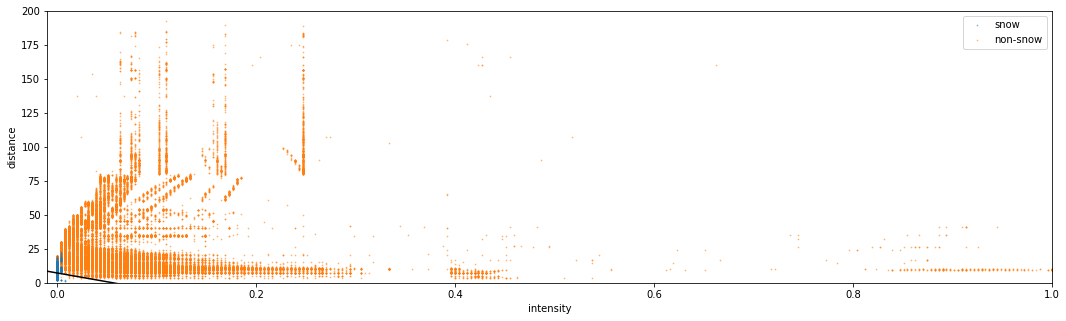

In [45]:
plt.subplots(figsize=(18,5))
plt.scatter(snow_intensity, snow_distance, 0.5, alpha=0.5, label='snow', zorder=2)
plt.scatter(non_snow_intensity, non_snow_distance, 0.5, alpha=0.5, label='non-snow', zorder=1)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.array(plt.xlim())
yy = a * xx - clf.intercept_[0] / w[1]
plt.ylim([0, 200])
plt.xlim([-0.01, 1])
plt.plot(xx, yy, 'k-')
plt.legend()
plt.xlabel('intensity')
plt.ylabel('distance')
plt.show()

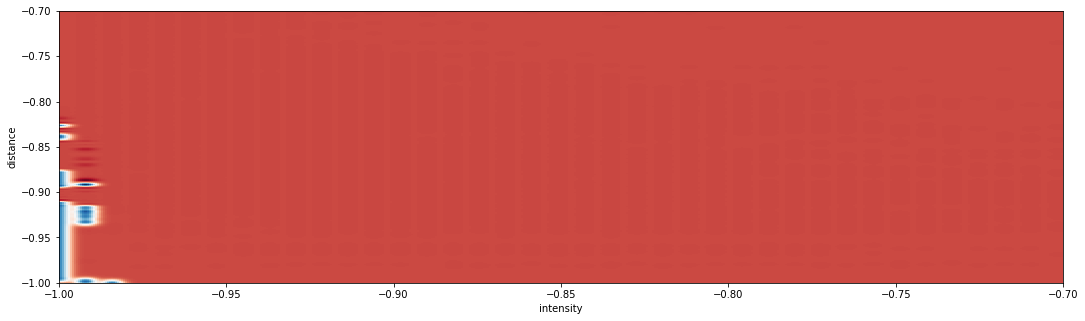

In [128]:
xx, yy = np.meshgrid(np.linspace(-1, -0.7, 500), np.linspace(-1, -0.7, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.subplots(figsize=(18,5))
plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
# plt.scatter(snow_intensity, snow_distance, 0.5, alpha=0.5, label='snow', zorder=2)
# plt.scatter(non_snow_intensity, non_snow_distance, 0.5, alpha=0.5, label='non-snow', zorder=1)
plt.ylim([-1, -0.7])
plt.xlim([-1, -0.7])
# plt.legend()
plt.xlabel('intensity')
plt.ylabel('distance')
plt.show()

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

In [57]:
snow_intensity = []
snow_distance = []
non_snow_intensity = []
non_snow_distance = []
for i, label in enumerate(y_train):
    if label == 0.0:
        snow_intensity.append(x_train[i][0])
        snow_distance.append(x_train[i][1])
    else:
        non_snow_intensity.append(x_train[i][0])
        non_snow_distance.append(x_train[i][1])
        
snow_intensity = np.asarray(snow_intensity)
snow_distance = np.asarray(snow_distance)
non_snow_intensity = np.asarray(non_snow_intensity)
non_snow_distance = np.asarray(non_snow_distance)

In [55]:
x_train[1][0]

-0.8509803861379623

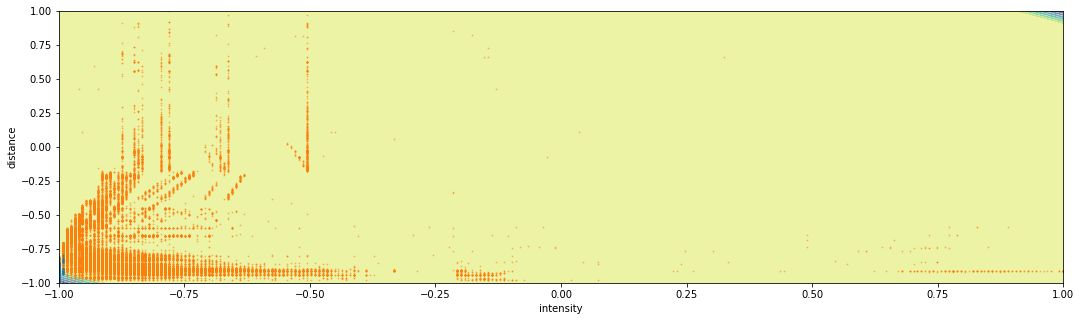

In [101]:
# xx, yy = np.meshgrid(np.linspace(-1, 1, 200), np.linspace(-1, 1, 200))
# Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.subplots(figsize=(18,5))
# plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(snow_intensity, snow_distance, 0.5, alpha=0.5, label='snow', zorder=2)
plt.scatter(non_snow_intensity, non_snow_distance, 0.5, alpha=0.5, label='non-snow', zorder=1)
plt.ylim([-1, 1])
plt.xlim([-1, 1])
# plt.legend()
plt.xlabel('intensity')
plt.ylabel('distance')
plt.show()


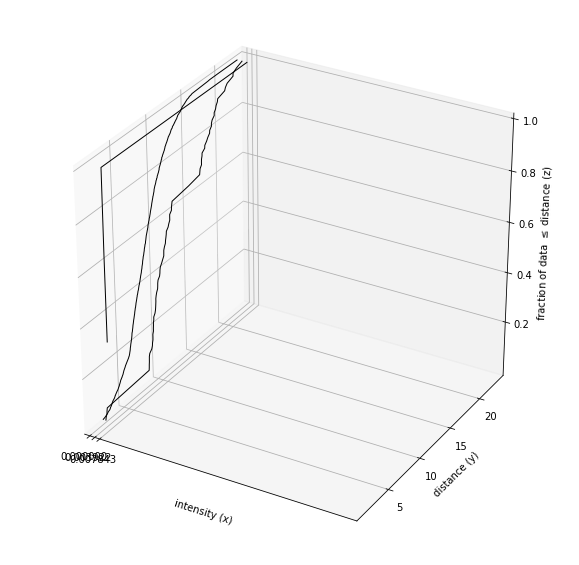

In [36]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import matplotlib as mpl

data = snow_distributions["distance_per_intensity"]
dmax = max(np.concatenate((list(data.values()))))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
verts = []
xticks = []
delta = 0
for intensity, distance in data.items():
#     if len(distance) < 3:
#         continue
        
    y, z = ecdf(distance)
    if y[-1] < dmax:
        y = np.append(y, dmax)
        z = np.append(z, 1)
    xticks += [intensity]
    x = np.ones(len(y)) * intensity
    ax.plot(x,y,z, c='k', lw=1, zorder=10)
    y = np.append(y, dmax)
    z = np.append(z, z[0])
    x = np.append(x, x[-1])
    verts.append(np.stack((x,y,z)).T)

facecolors = mpl.cm.cmaps_listed['viridis_r'](np.linspace(0, 1, len(verts)))
collection = Poly3DCollection(verts, facecolors=facecolors, alpha=0.1)
collection.set_color('w') #['c', 'm', 'y', 'k'])
# collection.set_color(['cyan', 'yellow', 'red'])
# collection.set_edgecolor(['c', 'm', 'y', 'k'])
ax.add_collection3d(collection)
ax.set_xlabel('intensity (x)')
ax.set_xticks(xticks)
ax.set_ylabel('distance (y)')
ax.set_zlabel('fraction of data $\leq$ distance (z)')
ax.set_xlim([0, 0.2])
plt.show()


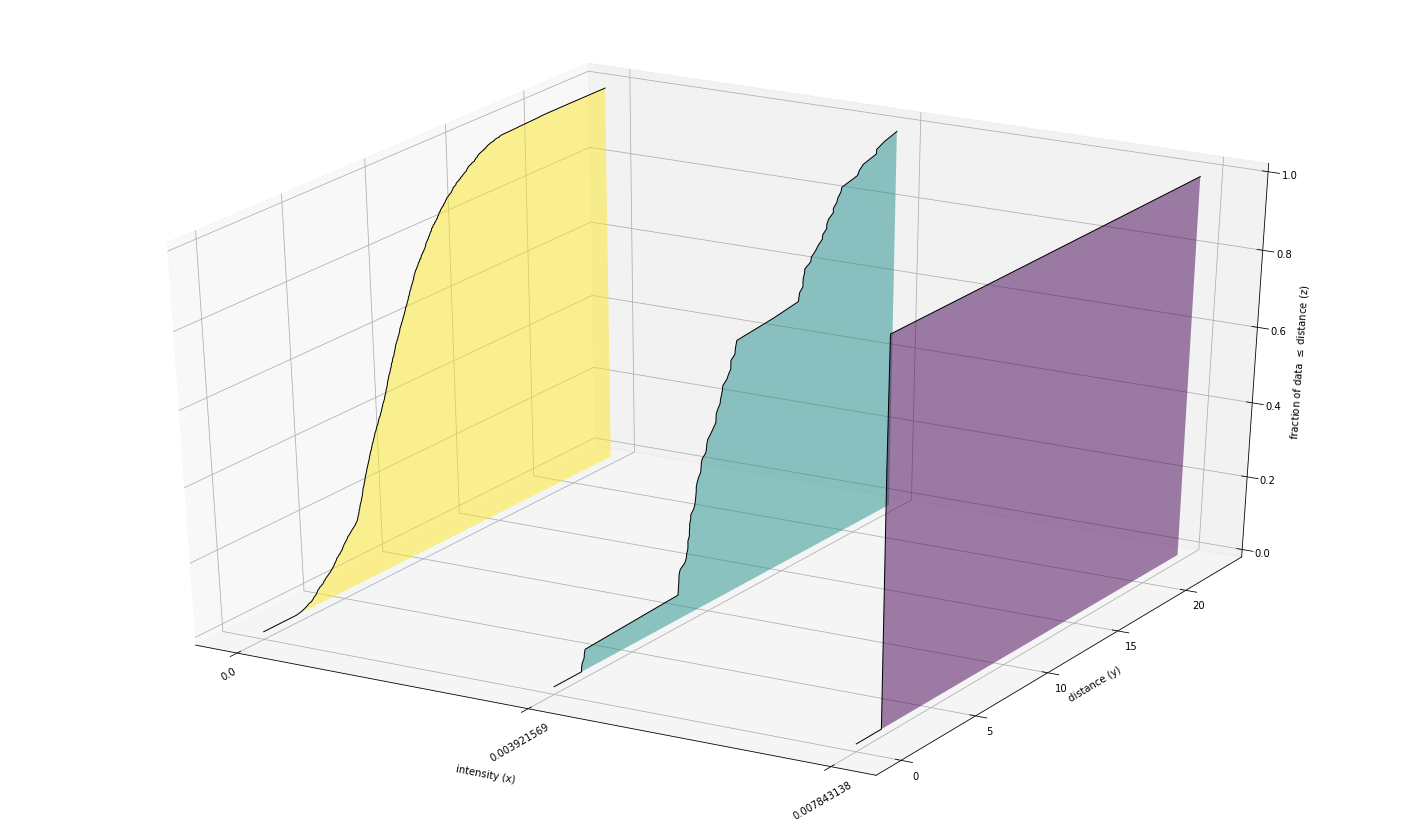

In [561]:
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

data = snow_distributions["distance_per_intensity"]
dmax = max(np.concatenate((list(data.values()))))
fig = plt.figure(figsize=(25,15))

ax = fig.add_subplot(111, projection='3d')
verts = []
xticks = []
delta = 0
for intensity, distance in sorted(snow_distributions["distance_per_intensity"].items()):
#     if len(distance) < 3:
#         continue
        
    y, z = ecdf(distance)
    
    # Adding the first two points to make correct CDF
    y = np.concatenate(([0.0, y[0]], y))
    z = np.concatenate(([0.0, 0.0], z))
    
    # Adding last point
    if y[-1] < dmax:
        y = np.append(y, dmax)
        z = np.append(z, 1)
        
    xticks += [intensity]
    x = np.ones(len(y)) * intensity
    ax.plot(x,y,z, c='k', lw=1, zorder=10)
    y = np.append(y, dmax)
    z = np.append(z, z[0])
    x = np.append(x, x[-1])
    verts.append(np.stack((y,z)).T)

facecolors = mpl.cm.cmaps_listed['viridis_r'](np.linspace(0, 1, len(verts)))
collection = PolyCollection(verts, facecolors=facecolors, alpha=0.5)
ax.add_collection3d(collection, zs=xticks, zdir='x')
ax.set_xlabel('intensity (x)', labelpad=40.0)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=30)
ax.set_ylabel('distance (y)')
ax.set_zlabel('fraction of data $\leq$ distance (z)')
# ax.set_xlim([0, 0.2])
plt.show()
